<a href="https://colab.research.google.com/github/ericcurtygiorno/Projeto_Real_L-gica/blob/main/Projeto_Real_L%C3%B3gica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregando Bibliotecas


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.mixture import GaussianMixture

sns.set(rc={'figure.figsize':(11.7,8.27)}) # isso é pras figuras ficarem maiores
import warnings
warnings.simplefilter("ignore")

# Base Clientes

In [ ]:
dfBase_Clientes = pd.read_excel("Base Clientes.xlsx")

## Limpeza dos dados + Estatística Descritiva

Criando uma cópia do dataset

In [ ]:
Base_Clientes_clean = dfBase_Clientes.copy()

Verificando os dados do dataset

In [ ]:
Base_Clientes_clean.head()

,id,user_id,created_at,updated_at,zoop_buyer_id,creditos,codigo_promocional,codigo_indicacao,banido,ativo,...,e_funcionario,shipp_gold_at,latitude,longitude,office,domain_id,customer_group_id,log_customer_groups,ban_reason_id,deleted_at
0,172909.0,241327.0,2020-09-09 14:40:32,2021-05-03 06:55:21,NaN,0.0,REN1V,NaN,False,True,...,0.0,NaN,NaN,NaN,0.0,9.0,NaN,NaN,NaN,NaN
1,172910.0,241328.0,2020-09-09 14:46:02,2022-05-06 17:14:17,2fb81e96fc6b43988af2dd0c027275b2,0.0,JOA3F,NaN,False,True,...,0.0,NaN,-20.297687,-40.300467,0.0,9.0,NaN,NaN,NaN,NaN
2,172942.0,241380.0,2020-09-10 08:08:48,2022-06-21 11:30:37,a846f96d5db2423fa0fa77d9cb21805c,0.0,TES10M,NaN,False,True,...,1.0,NaN,-20.288392,-40.290855,0.0,9.0,NaN,NaN,NaN,NaN
3,172960.0,241404.0,2020-09-10 12:07:36,2021-05-03 06:55:21,NaN,0.0,WEL183,NaN,False,True,...,0.0,NaN,NaN,NaN,0.0,9.0,NaN,NaN,NaN,NaN
4,172990.0,241474.0,2020-09-10 17:46:02,2021-05-03 06:55:21,c1b7757b13a741c2b7ba7ca18693fef8,0.0,JUL028,NaN,False,True,...,0.0,NaN,-23.560324,-46.755496,0.0,9.0,NaN,NaN,NaN,NaN


Verificando o tamanho do dataset

In [ ]:
Base_Clientes_clean.shape

(66308, 23)

Verificando quantidade de dados duplicados

In [ ]:
Base_Clientes_clean.duplicated().sum()

0

Verificando o tipo dos dados

In [ ]:
Base_Clientes_clean.dtypes

id                             float64
user_id                        float64
created_at              datetime64[ns]
updated_at              datetime64[ns]
zoop_buyer_id                   object
creditos                       float64
codigo_promocional              object
codigo_indicacao               float64
banido                            bool
ativo                             bool
codigo_verificacao             float64
cadastro_localizacao           float64
banido_job                        bool
e_funcionario                  float64
shipp_gold_at                  float64
latitude                       float64
longitude                      float64
office                         float64
domain_id                      float64
customer_group_id              float64
log_customer_groups            float64
ban_reason_id                  float64
deleted_at                      object
dtype: object

Verificando o número de nulos por coluna

In [ ]:
Base_Clientes_clean.isnull().sum()

id                          0
user_id                     0
created_at                  0
updated_at                  0
zoop_buyer_id           16389
creditos                    0
codigo_promocional       1466
codigo_indicacao        66308
banido                      0
ativo                       0
codigo_verificacao      66307
cadastro_localizacao    52324
banido_job                  0
e_funcionario               0
shipp_gold_at           66308
latitude                63628
longitude               63628
office                      0
domain_id                   0
customer_group_id       66308
log_customer_groups     66308
ban_reason_id           63457
deleted_at              66287
dtype: int64

Excluindo as colunas que não pretendemos utilizar.

In [ ]:
Base_Clientes_clean = Base_Clientes_clean.drop(Base_Clientes_clean[['creditos', 'codigo_indicacao', 'codigo_verificacao', 'e_funcionario', 'shipp_gold_at', 'latitude', 'longitude', 'office', 'domain_id', 'customer_group_id', 'log_customer_groups', 'ban_reason_id', 'deleted_at' ]], axis=1)
Base_Clientes_clean.head()

,id,user_id,created_at,updated_at,zoop_buyer_id,codigo_promocional,banido,ativo,cadastro_localizacao,banido_job
0,172909.0,241327.0,2020-09-09 14:40:32,2021-05-03 06:55:21,NaN,REN1V,False,True,NaN,False
1,172910.0,241328.0,2020-09-09 14:46:02,2022-05-06 17:14:17,2fb81e96fc6b43988af2dd0c027275b2,JOA3F,False,True,NaN,False
2,172942.0,241380.0,2020-09-10 08:08:48,2022-06-21 11:30:37,a846f96d5db2423fa0fa77d9cb21805c,TES10M,False,True,NaN,False
3,172960.0,241404.0,2020-09-10 12:07:36,2021-05-03 06:55:21,NaN,WEL183,False,True,NaN,False
4,172990.0,241474.0,2020-09-10 17:46:02,2021-05-03 06:55:21,c1b7757b13a741c2b7ba7ca18693fef8,JUL028,False,True,NaN,False


Removendo as horas das colunas created_at e updated_at




In [ ]:
Base_Clientes_clean['created_at'] = pd.to_datetime(Base_Clientes_clean['created_at']).dt.normalize()
Base_Clientes_clean['updated_at'] = pd.to_datetime(Base_Clientes_clean['updated_at']).dt.normalize()
Base_Clientes_clean.head()

,id,user_id,created_at,updated_at,zoop_buyer_id,codigo_promocional,banido,ativo,cadastro_localizacao,banido_job
0,172909.0,241327.0,2020-09-09,2021-05-03,NaN,REN1V,False,True,NaN,False
1,172910.0,241328.0,2020-09-09,2022-05-06,2fb81e96fc6b43988af2dd0c027275b2,JOA3F,False,True,NaN,False
2,172942.0,241380.0,2020-09-10,2022-06-21,a846f96d5db2423fa0fa77d9cb21805c,TES10M,False,True,NaN,False
3,172960.0,241404.0,2020-09-10,2021-05-03,NaN,WEL183,False,True,NaN,False
4,172990.0,241474.0,2020-09-10,2021-05-03,c1b7757b13a741c2b7ba7ca18693fef8,JUL028,False,True,NaN,False


Removendo mais uma coluna que não haverá utilidade

In [ ]:
Base_Clientes_clean = Base_Clientes_clean.drop(Base_Clientes_clean[['zoop_buyer_id']], axis=1)

Verificando o tipo das variáveis após a exclusão das colunas


In [ ]:
Base_Clientes_clean.dtypes

id                             float64
user_id                        float64
created_at              datetime64[ns]
updated_at              datetime64[ns]
codigo_promocional              object
banido                            bool
ativo                             bool
cadastro_localizacao           float64
banido_job                        bool
dtype: object

In [ ]:
Base_Clientes_clean.shape

(66308, 9)

In [ ]:
Base_Clientes_clean.head()

,id,user_id,created_at,updated_at,codigo_promocional,banido,ativo,cadastro_localizacao,banido_job
0,172909.0,241327.0,2020-09-09,2021-05-03,REN1V,False,True,NaN,False
1,172910.0,241328.0,2020-09-09,2022-05-06,JOA3F,False,True,NaN,False
2,172942.0,241380.0,2020-09-10,2022-06-21,TES10M,False,True,NaN,False
3,172960.0,241404.0,2020-09-10,2021-05-03,WEL183,False,True,NaN,False
4,172990.0,241474.0,2020-09-10,2021-05-03,JUL028,False,True,NaN,False


# Base Pedidos

In [ ]:
dfBase_Pedidos = pd.read_excel("Base Pedidos.xlsx")

## Limpeza dos dados + Estatística Descritiva

Criando uma cópia do dataset

In [ ]:
Base_Pedidos_clean = dfBase_Pedidos.copy()

Verificando o dataset

In [ ]:
Base_Pedidos_clean.head()

,id,cliente_id,created_at,updated_at,loja_id,estado,zoop_transaction_id,creditos_payout,endereco_cliente_id,address_store_id,...,cpf_cartao,editado,canceled_at,notification_at,domain_id,liquid_amount,discount_amount,reference_provider,reference_id,amount_product_exemption
0,2119741.0,697498.0,2022-06-30 23:59:30,2022-06-30 23:59:46,10086.0,F,1871894.0,0.0,1436403.0,1436403.0,...,NaN,False,NaN,NaN,9.0,NaN,NaN,NaN,NaN,0.0
1,2119740.0,239055.0,2022-06-30 23:57:57,2022-07-01 00:18:02,4677.0,C,1871893.0,0.0,1079439.0,1079439.0,...,NaN,False,NaN,NaN,9.0,NaN,NaN,NaN,NaN,0.0
2,2119739.0,342928.0,2022-06-30 23:56:18,2022-06-30 23:56:36,5122.0,F,1871892.0,0.0,1134879.0,1134879.0,...,NaN,False,NaN,NaN,9.0,NaN,NaN,NaN,NaN,0.0
3,2119738.0,668123.0,2022-06-30 23:56:09,2022-06-30 23:57:25,10091.0,F,1871891.0,0.0,1436530.0,1436530.0,...,NaN,False,NaN,NaN,9.0,NaN,NaN,NaN,NaN,0.0
4,2119736.0,668123.0,2022-06-30 23:55:16,2022-06-30 23:55:20,10091.0,C,1871890.0,0.0,1436530.0,1436530.0,...,NaN,False,NaN,NaN,9.0,NaN,NaN,NaN,NaN,0.0


Verificando o tamanho do dataset

In [ ]:
Base_Pedidos_clean.shape

(81044, 81)

Verificando a quantidade de duplicados

In [ ]:
Base_Pedidos_clean.duplicated().sum()

0

Verificando o tipo das variáveis

In [ ]:
Base_Pedidos_clean.dtypes

id                                 float64
cliente_id                         float64
created_at                  datetime64[ns]
updated_at                  datetime64[ns]
loja_id                            float64
                                 ...      
liquid_amount                      float64
discount_amount                    float64
reference_provider                 float64
reference_id                       float64
amount_product_exemption           float64
Length: 81, dtype: object

Verificando a quantidade de nulos

In [ ]:
Base_Pedidos_clean.isnull().sum()

id                              0
cliente_id                      0
created_at                      0
updated_at                      0
loja_id                         0
                            ...  
liquid_amount               81044
discount_amount             81044
reference_provider          81044
reference_id                81044
amount_product_exemption    79096
Length: 81, dtype: int64

Elimando as colunas que não serão necessárias para nossa análise.

In [ ]:
Base_Pedidos_clean = Base_Pedidos_clean.drop(Base_Pedidos_clean[['zoop_transaction_id', 'products_combo_payout', 'reverso', 'tipo', 'correcao_id', 'buyer_id', 'comissao_concierge', 'payment_method_id', 'em_nome_da_loja', 'valor_recebido', 'valor_declarado', 'service_type', 'taxa_nao_parceiro', 'takeout_payout', 'e_shipp_gold', 'e_cliente_gold', 'distancia', 'office_payout', 'taxa_servico_loja', 'em_espera', 'time_shift', 'distance', 'aproved_at', 'tempo_preparo',  'bin', 'end', 'versao_app', 'owner_name', 'expected_on', 'zoop_np_transfer_id', 'zoop_split_rule_id', 'e_critico', 'cpf_nota', 'recebedor', 'refeito', 'com_pedagio', 'taxa_entrega', 'taxa_bonus', 'motivo_recusa', 'comprovante_pagamento', 'regiao', 'cancelado_por', 'taxa_base', 'dispatched_at', 'mensagens', 'cliente_nao_recebeu', 'ligacoes', 'cpf_cartao', 'editado', 'canceled_at', 'notification_at', 'domain_id', 'liquid_amount', 'discount_amount', 'reference_provider', 'reference_id', 'amount_product_exemption'  ]], axis=1)
Base_Pedidos_clean.head()

,id,cliente_id,created_at,updated_at,loja_id,estado,creditos_payout,endereco_cliente_id,address_store_id,taxa_entrega_cliente,...,voucher_id,voucher_payout,comissao,score,metodo_pagamento,taxa_entrega_payout,modo_entrega,motivo_id,cash_back,estado_pagamento
0,2119741.0,697498.0,2022-06-30 23:59:30,2022-06-30 23:59:46,10086.0,F,0.0,1436403.0,1436403.0,0.0,...,NaN,0.0,3.0,1.0,CARTAO_CREDITO,0.0,TAKEOUT_LOCAL,NaN,0.0,CAPTURADO
1,2119740.0,239055.0,2022-06-30 23:57:57,2022-07-01 00:18:02,4677.0,C,0.0,1079439.0,1079439.0,0.0,...,NaN,0.0,5.0,NaN,PIX,0.0,TAKEOUT_LOCAL,0.0,0.0,CANCELADO
2,2119739.0,342928.0,2022-06-30 23:56:18,2022-06-30 23:56:36,5122.0,F,0.0,1134879.0,1134879.0,0.0,...,NaN,0.0,3.0,0.0,CARTAO_CREDITO,0.0,TAKEOUT_LOCAL,NaN,0.0,CAPTURADO
3,2119738.0,668123.0,2022-06-30 23:56:09,2022-06-30 23:57:25,10091.0,F,0.0,1436530.0,1436530.0,0.0,...,NaN,0.0,0.0,NaN,PIX,0.0,TAKEOUT_LOCAL,NaN,0.0,CAPTURADO
4,2119736.0,668123.0,2022-06-30 23:55:16,2022-06-30 23:55:20,10091.0,C,0.0,1436530.0,1436530.0,0.0,...,NaN,0.0,0.0,NaN,CARTAO_CREDITO,0.0,TAKEOUT_LOCAL,NaN,0.0,FALHADO


Verificando a quantidade de pedidos finalizados (F), cancelados (C) e em processamento (P).

In [ ]:
Base_Pedidos_clean['estado'].value_counts()

F    71489
C     9418
P      137
Name: estado, dtype: int64

Verificando o tipo das variáveis após a exclusão das colunas


In [ ]:
Base_Pedidos_clean.dtypes

id                             float64
cliente_id                     float64
created_at              datetime64[ns]
updated_at              datetime64[ns]
loja_id                        float64
estado                          object
creditos_payout                float64
endereco_cliente_id            float64
address_store_id               float64
taxa_entrega_cliente           float64
valor                          float64
original_amount                float64
amount                         float64
gorjeta                        float64
voucher_id                     float64
voucher_payout                 float64
comissao                       float64
score                          float64
metodo_pagamento                object
taxa_entrega_payout            float64
modo_entrega                    object
motivo_id                      float64
cash_back                      float64
estado_pagamento                object
dtype: object

In [ ]:
Base_Pedidos_clean.shape

(81044, 24)

# Base Produtos Vendidos

In [ ]:
dfBase_Produtos_Vendidos = pd.read_excel("Base Produtos Vendidos.xlsx")

## Limpeza dos dados + Estatística Descritiva

Criando uma cópia do dataset

In [ ]:
Base_Prod_Vend_clean = dfBase_Produtos_Vendidos.copy()

Verificando o dataset

In [ ]:
Base_Prod_Vend_clean.head()

,id,produto_id,pedido_id,nome,sku,preco,descricao,peso,categoria,em_promocao,...,granel,gramatura,estorno,confirm,correcao,domain_id,ean,is_peca,internal_code,exemption
0,4978887.0,3395039.0,2119741.0,Bis Xtra Ao Leite 45g,19053200,3.49,,1.0,Bomboniere,False,...,False,0.0,NONE,1.0,0.0,9.0,7622210566362,0.0,NaN,0.0
1,4978886.0,2941367.0,2119741.0,Amendoim Pettiz Cebola E Salsa 50g,12024200,2.99,,1.0,Snacks,False,...,False,0.0,NONE,1.0,0.0,9.0,7896058593167,0.0,NaN,0.0
2,4978885.0,2941443.0,2119741.0,Bala Morango Halls Pacote 34g,17049020,1.99,,1.0,Bomboniere,False,...,False,0.0,NONE,1.0,0.0,9.0,7895800432020,0.0,NaN,0.0
3,4978884.0,1289188.0,2119740.0,Refrigerante Coca-cola Lata 310ml,22021000,4.90,NaN,1.0,Soft Drinks,False,...,False,1000.0,NONE,1.0,0.0,9.0,7894900011159,0.0,NaN,0.0
4,4978883.0,1332139.0,2119740.0,Cerveja Lager Premium Puro Malte Zero Álcool H...,22029100,7.50,NaN,1.0,Cervejas,False,...,False,1000.0,NONE,1.0,0.0,9.0,7896045506057,0.0,NaN,0.0


Verificando o tamanho do dataset

In [ ]:
Base_Prod_Vend_clean.shape

(170459, 30)

Verificando a quantidade de duplicados

In [ ]:
Base_Prod_Vend_clean.duplicated().sum()

0

Verificando o tipo das variáveis

In [ ]:
Base_Prod_Vend_clean.dtypes

id                           float64
produto_id                   float64
pedido_id                    float64
nome                          object
sku                           object
preco                        float64
descricao                     object
peso                         float64
categoria                     object
em_promocao                     bool
preco_promocional            float64
minimo_complemento           float64
maximo_complemento           float64
minimo_adicional             float64
maximo_adicional             float64
quantidade                   float64
observacao                    object
created_at            datetime64[ns]
updated_at            datetime64[ns]
deleted_at            datetime64[ns]
granel                          bool
gramatura                    float64
estorno                       object
confirm                      float64
correcao                     float64
domain_id                    float64
ean                           object
i

Verificando a quantidade de nulos

In [ ]:
Base_Prod_Vend_clean.isnull().sum()

id                         0
produto_id                 0
pedido_id                  0
nome                       0
sku                        0
preco                      0
descricao             111526
peso                       0
categoria                  0
em_promocao                0
preco_promocional     165963
minimo_complemento         0
maximo_complemento         0
minimo_adicional           0
maximo_adicional           0
quantidade                 0
observacao            170457
created_at                 0
updated_at                 0
deleted_at            170345
granel                     0
gramatura                125
estorno                    0
confirm                    0
correcao                   0
domain_id                  0
ean                     2136
is_peca                    0
internal_code         170459
exemption             166177
dtype: int64

Excluindo as colunas que não serão necessárias

In [ ]:
Base_Prod_Vend_clean = Base_Prod_Vend_clean.drop(Base_Prod_Vend_clean[['peso', 'minimo_complemento', 'maximo_complemento', 'minimo_adicional', 'maximo_adicional', 'observacao', 'granel', 'gramatura', 'estorno','confirm', 'correcao','domain_id', 'ean', 'is_peca', 'internal_code', 'exemption']], axis=1)
Base_Prod_Vend_clean.head()

,id,produto_id,pedido_id,nome,sku,preco,descricao,categoria,em_promocao,preco_promocional,quantidade,created_at,updated_at,deleted_at
0,4978887.0,3395039.0,2119741.0,Bis Xtra Ao Leite 45g,19053200,3.49,,Bomboniere,False,NaN,1.0,2022-06-30 23:59:31,2022-06-30 23:59:31,NaT
1,4978886.0,2941367.0,2119741.0,Amendoim Pettiz Cebola E Salsa 50g,12024200,2.99,,Snacks,False,NaN,1.0,2022-06-30 23:59:31,2022-06-30 23:59:31,NaT
2,4978885.0,2941443.0,2119741.0,Bala Morango Halls Pacote 34g,17049020,1.99,,Bomboniere,False,NaN,1.0,2022-06-30 23:59:30,2022-06-30 23:59:30,NaT
3,4978884.0,1289188.0,2119740.0,Refrigerante Coca-cola Lata 310ml,22021000,4.90,NaN,Soft Drinks,False,NaN,1.0,2022-06-30 23:57:57,2022-06-30 23:57:57,NaT
4,4978883.0,1332139.0,2119740.0,Cerveja Lager Premium Puro Malte Zero Álcool H...,22029100,7.50,NaN,Cervejas,False,NaN,1.0,2022-06-30 23:57:57,2022-06-30 23:57:57,NaT


Conferindo o número de colunas após a exclusão

In [ ]:
Base_Prod_Vend_clean.shape

(170459, 14)

Conferindo o tipo das variáveis restantes

In [ ]:
Base_Prod_Vend_clean.dtypes

id                          float64
produto_id                  float64
pedido_id                   float64
nome                         object
sku                          object
preco                       float64
descricao                    object
categoria                    object
em_promocao                    bool
preco_promocional           float64
quantidade                  float64
created_at           datetime64[ns]
updated_at           datetime64[ns]
deleted_at           datetime64[ns]
dtype: object

Gráfico da distribuição das categorias (precisa ajustar as categorias, como é possível verificar no gráfico)

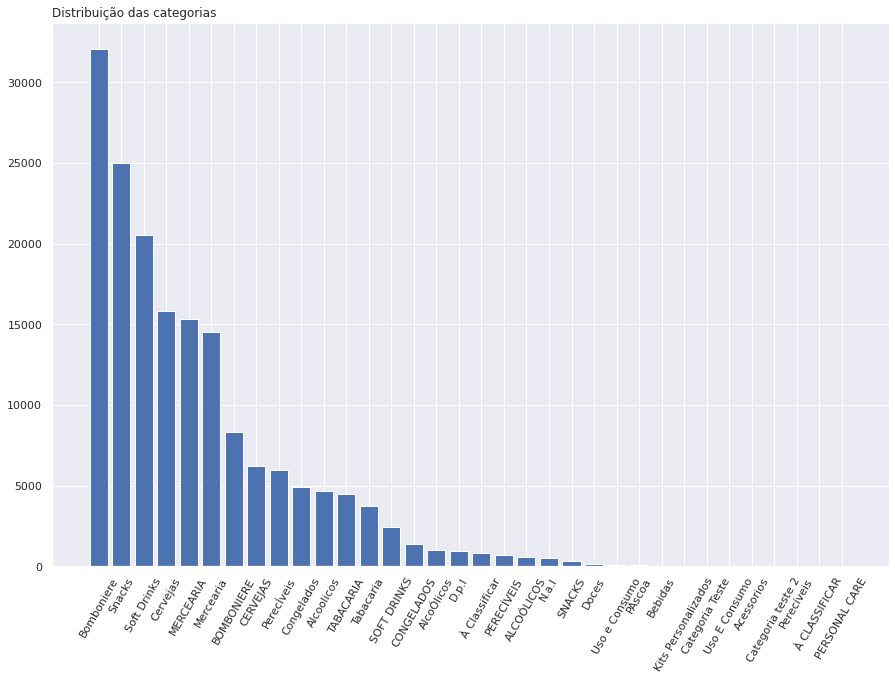

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.bar(Base_Prod_Vend_clean['categoria'].unique(), Base_Prod_Vend_clean['categoria'].value_counts())
plt.xticks(rotation=60)
plt.title("Distribuição das categorias", loc='left')
plt.show()

Corrigindo o problema do nome das categorias:

Transformando todos os nomes em maiúsculo.

In [ ]:
Base_Prod_Vend_clean['categoria'] = Base_Prod_Vend_clean['categoria'].str.upper()

Gráfico da distribuição das categorias com as categorias com os nomes em maiúsculo.

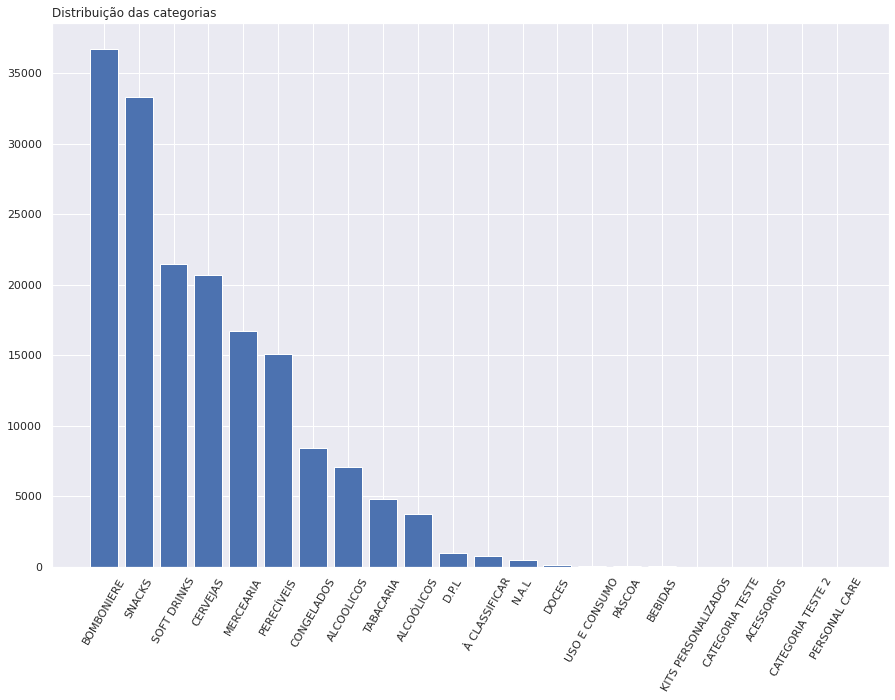

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.bar(Base_Prod_Vend_clean['categoria'].unique(), Base_Prod_Vend_clean['categoria'].value_counts())
plt.xticks(rotation=60)
plt.title("Distribuição das categorias", loc='left')
plt.show()

Conferindo o que há de produto nessas categorias abaixo para poder incluí-las em uma outra categoria ou mantê-las nas próprias categorias.

In [ ]:
Base_Prod_Vend_clean[Base_Prod_Vend_clean.categoria == 'D.P.L'].head(1)

,id,produto_id,pedido_id,nome,sku,preco,descricao,categoria,em_promocao,preco_promocional,quantidade,created_at,updated_at,deleted_at
113,4978636.0,2941201.0,2119593.0,Toalha De Papel Kitchen Com 2,48189090,5.99,,D.P.L,False,NaN,2.0,2022-06-30 22:15:08,2022-06-30 22:15:08,NaT


In [ ]:
Base_Prod_Vend_clean[Base_Prod_Vend_clean.categoria == 'À CLASSIFICAR'].head(1)

,id,produto_id,pedido_id,nome,sku,preco,descricao,categoria,em_promocao,preco_promocional,quantidade,created_at,updated_at,deleted_at
178,4978468.0,3234902.0,2119482.0,Fusilli Com Tiras De Frango PerdigÃo Meu Menu ...,19023000,11.99,,À CLASSIFICAR,False,NaN,1.0,2022-06-30 21:39:32,2022-06-30 21:39:32,NaT


In [ ]:
Base_Prod_Vend_clean[Base_Prod_Vend_clean.categoria == 'N.A.L'].head(1)

,id,produto_id,pedido_id,nome,sku,preco,descricao,categoria,em_promocao,preco_promocional,quantidade,created_at,updated_at,deleted_at
236,4978222.0,2652713.0,2119330.0,"Gelo Rocha 2,5kg",22019000,3.99,NaN,N.A.L,False,NaN,1.0,2022-06-30 21:00:51,2022-06-30 21:00:51,NaT


In [ ]:
Base_Prod_Vend_clean[Base_Prod_Vend_clean.categoria == 'USO E CONSUMO'].head(1)

,id,produto_id,pedido_id,nome,sku,preco,descricao,categoria,em_promocao,preco_promocional,quantidade,created_at,updated_at,deleted_at
1739,4972334.0,2068640.0,2116329.0,Pilha Alcalina Aa Mn 1500b2 Duracell 2 Unidade...,85063090,14.9,NaN,USO E CONSUMO,False,NaN,2.0,2022-06-29 19:44:00,2022-06-29 19:44:00,NaT


In [ ]:
Base_Prod_Vend_clean[Base_Prod_Vend_clean.categoria == 'BEBIDAS'].head(1)

,id,produto_id,pedido_id,nome,sku,preco,descricao,categoria,em_promocao,preco_promocional,quantidade,created_at,updated_at,deleted_at
18390,4894217.0,3160061.0,2076589.0,Suco de Uva,SHIPP,2.0,NaN,BEBIDAS,False,NaN,1.0,2022-06-17 11:04:31,2022-06-17 11:04:31,NaT


In [ ]:
Base_Prod_Vend_clean[Base_Prod_Vend_clean.categoria == 'PÁSCOA'].head(1)

,id,produto_id,pedido_id,nome,sku,preco,descricao,categoria,em_promocao,preco_promocional,quantidade,created_at,updated_at,deleted_at
4898,4960396.0,2278989.0,2110721.0,Barrinha Le Chocolatier Chocolate Ao Leite 20g,18063210,4.99,NaN,PÁSCOA,False,NaN,1.0,2022-06-27 18:25:55,2022-06-27 18:25:55,NaT


In [ ]:
Base_Prod_Vend_clean[Base_Prod_Vend_clean.categoria == 'KITS PERSONALIZADOS'].head(1)

,id,produto_id,pedido_id,nome,sku,preco,descricao,categoria,em_promocao,preco_promocional,quantidade,created_at,updated_at,deleted_at
25077,4866344.0,3212760.0,2062406.0,Sacola Gaafer Amo Voce 470g,18063110,69.9,,KITS PERSONALIZADOS,False,NaN,1.0,2022-06-12 17:21:44,2022-06-12 17:21:44,NaT


In [ ]:
Base_Prod_Vend_clean[Base_Prod_Vend_clean.categoria == 'ACESSORIOS'].head(1)

,id,produto_id,pedido_id,nome,sku,preco,descricao,categoria,em_promocao,preco_promocional,quantidade,created_at,updated_at,deleted_at
53612,4727017.0,1750737.0,1992993.0,Pilha Comum Aa Panasonic Superhyper C4,85061020,8.9,NaN,ACESSORIOS,False,NaN,1.0,2022-05-17 22:19:41,2022-05-17 22:19:41,NaT


In [ ]:
Base_Prod_Vend_clean[Base_Prod_Vend_clean.categoria == 'PERSONAL CARE'].head(1)

,id,produto_id,pedido_id,nome,sku,preco,descricao,categoria,em_promocao,preco_promocional,quantidade,created_at,updated_at,deleted_at
151987,4197380.0,1077057.0,1732109.0,Absorvente com Abas Extra Suave Intimus Tripla...,SHIPP,5.36,Absorvente com Abas Extra Suave Intimus Tripla...,PERSONAL CARE,False,NaN,1.0,2022-02-04 01:53:27,2022-02-04 01:53:27,NaT


In [ ]:
Base_Prod_Vend_clean[Base_Prod_Vend_clean.categoria == 'CATEGORIA TESTE'].head(1)

,id,produto_id,pedido_id,nome,sku,preco,descricao,categoria,em_promocao,preco_promocional,quantidade,created_at,updated_at,deleted_at
37872,4802731.0,2638565.0,2030106.0,Suco de limão,SHIPP,5.0,NaN,CATEGORIA TESTE,False,NaN,1.0,2022-06-01 11:34:04,2022-06-01 11:34:04,NaT


In [ ]:
Base_Prod_Vend_clean[Base_Prod_Vend_clean.categoria == 'CATEGORIA TESTE 2'].head(1)

,id,produto_id,pedido_id,nome,sku,preco,descricao,categoria,em_promocao,preco_promocional,quantidade,created_at,updated_at,deleted_at
54791,4720838.0,2638725.0,1989980.0,Suco de uva,SHIPP,5.0,NaN,CATEGORIA TESTE 2,True,4.5,3.0,2022-05-16 17:25:09,2022-05-16 17:25:09,NaT


Alterando o nome de algumas categorias e as ajustando para categorias únicas.

In [ ]:
Base_Prod_Vend_clean.replace('ALCOÓLICOS', 'ALCOOLICOS', inplace = True)
Base_Prod_Vend_clean.replace('DOCES', 'BOMBONIERE', inplace = True)
Base_Prod_Vend_clean.replace('BEBIDAS', 'SOFT DRINKS', inplace = True)
Base_Prod_Vend_clean.replace('D.P.L', 'HIGIENE E LIMPEZA', inplace = True)
Base_Prod_Vend_clean.replace('À CLASSIFICAR', 'PRODUTOS GERAIS', inplace = True)
Base_Prod_Vend_clean.replace('N.A.L', 'PRODUTOS GERAIS', inplace = True)
Base_Prod_Vend_clean.replace('USO E CONSUMO', 'PRODUTOS GERAIS', inplace = True)
Base_Prod_Vend_clean.replace('PÁSCOA', 'BOMBONIERE', inplace = True)
Base_Prod_Vend_clean.replace('KITS PERSONALIZADOS', 'PRODUTOS GERAIS', inplace = True)
Base_Prod_Vend_clean.replace('PERSONAL CARE', 'HIGIENE E LIMPEZA', inplace = True)

Verificando o tamanho do dataset

In [ ]:
Base_Prod_Vend_clean.shape

(170459, 14)

Excluindo ambas os linhas com as categorias abaixo, pois não há relevância para o andamento do projeto por serem categorias de teste.

In [ ]:
Base_Prod_Vend_clean = Base_Prod_Vend_clean[Base_Prod_Vend_clean.categoria != 'CATEGORIA TESTE']

In [ ]:
Base_Prod_Vend_clean = Base_Prod_Vend_clean[Base_Prod_Vend_clean.categoria != 'CATEGORIA TESTE 2']

Verificando se há algum tipo de correlação entre as variáveis.

In [ ]:
Base_Prod_Vend_clean.corr()

,id,produto_id,pedido_id,preco,em_promocao,preco_promocional,quantidade
id,1.000000,0.406578,0.999756,-0.012169,-0.000282,-0.029675,-0.001659
produto_id,0.406578,1.000000,0.405764,0.004980,-0.015029,-0.032610,-0.012845
pedido_id,0.999756,0.405764,1.000000,-0.012243,-0.000291,-0.028502,-0.001816
preco,-0.012169,0.004980,-0.012243,1.000000,0.029842,0.969501,-0.057332
em_promocao,-0.000282,-0.015029,-0.000291,0.029842,1.000000,0.030575,0.079216
preco_promocional,-0.029675,-0.032610,-0.028502,0.969501,0.030575,1.000000,-0.094499
quantidade,-0.001659,-0.012845,-0.001816,-0.057332,0.079216,-0.094499,1.000000


Verificando o tipo das variáveis.

In [ ]:
Base_Prod_Vend_clean.dtypes

id                          float64
produto_id                  float64
pedido_id                   float64
nome                         object
sku                          object
preco                       float64
descricao                    object
categoria                    object
em_promocao                    bool
preco_promocional           float64
quantidade                  float64
created_at           datetime64[ns]
updated_at           datetime64[ns]
deleted_at           datetime64[ns]
dtype: object

Verificando o tamanho da base após a exclusão de algumas linhas.

In [ ]:
Base_Prod_Vend_clean.shape

(170333, 14)

Gráfico da distribuição das categorias final já com as categorias ajustadas.

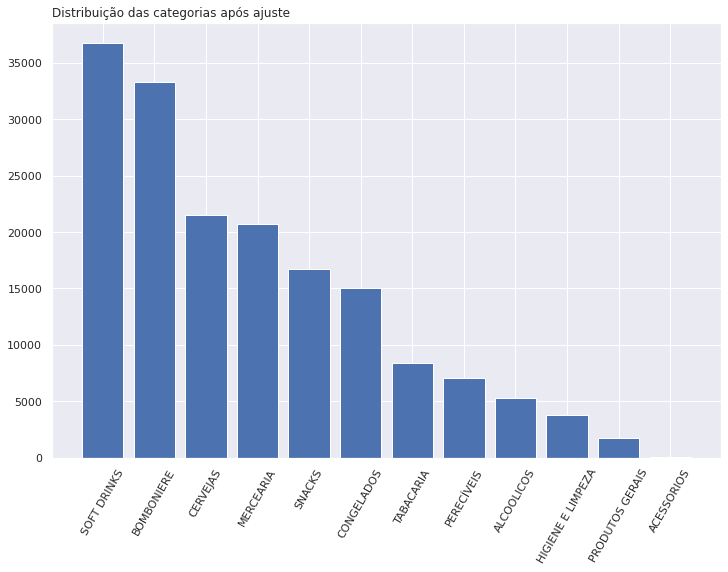

In [ ]:
fig = plt.figure(figsize=(12,8))
categoria_x = ['SOFT DRINKS', 'BOMBONIERE', 'CERVEJAS', 'MERCEARIA', 'SNACKS', 'CONGELADOS', 'TABACARIA', 'PERECÍVEIS', 'ALCOOLICOS', 'HIGIENE E LIMPEZA', 'PRODUTOS GERAIS', 'ACESSORIOS' ]
plt.bar(categoria_x, Base_Prod_Vend_clean['categoria'].value_counts())
plt.xticks(rotation=60)
plt.title("Distribuição das categorias após ajuste", loc='left')
plt.show()

In [ ]:
Base_Prod_Vend_clean.head()

,id,produto_id,pedido_id,nome,sku,preco,descricao,categoria,em_promocao,preco_promocional,quantidade,created_at,updated_at,deleted_at
0,4978887.0,3395039.0,2119741.0,Bis Xtra Ao Leite 45g,19053200,3.49,,BOMBONIERE,False,NaN,1.0,2022-06-30 23:59:31,2022-06-30 23:59:31,NaT
1,4978886.0,2941367.0,2119741.0,Amendoim Pettiz Cebola E Salsa 50g,12024200,2.99,,SNACKS,False,NaN,1.0,2022-06-30 23:59:31,2022-06-30 23:59:31,NaT
2,4978885.0,2941443.0,2119741.0,Bala Morango Halls Pacote 34g,17049020,1.99,,BOMBONIERE,False,NaN,1.0,2022-06-30 23:59:30,2022-06-30 23:59:30,NaT
3,4978884.0,1289188.0,2119740.0,Refrigerante Coca-cola Lata 310ml,22021000,4.90,NaN,SOFT DRINKS,False,NaN,1.0,2022-06-30 23:57:57,2022-06-30 23:57:57,NaT
4,4978883.0,1332139.0,2119740.0,Cerveja Lager Premium Puro Malte Zero Álcool H...,22029100,7.50,NaN,CERVEJAS,False,NaN,1.0,2022-06-30 23:57:57,2022-06-30 23:57:57,NaT


# Base Vouchers

In [ ]:
dfBase_Vouchers = pd.read_excel("Base Vouchers.xlsx")

## Limpeza dos dados + Estatística Descritiva

Criando uma cópia do dataset

In [ ]:
Base_Voucher_clean = dfBase_Vouchers.copy()

Verificando os dados do dataset

In [ ]:
Base_Voucher_clean.head()

,id,chave,desconto,valor_minimo,tipo_desconto,validade,promotion_recurrence,quantidade_total,quantidade_por_usuario,frete_gratis,...,rules,domain_id,gera_retencao,retention_percentage,owner,expired_by,categorias,franchise_id,payment_type,delivery_method
0,89536.0,MAR3DN-694732,0.0,0.0,A,2025-07-07 19:57:16,NaN,1.0,1.0,False,...,NaN,9.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,89509.0,FABO5-676494,0.0,0.0,A,2025-07-07 18:44:59,NaN,1.0,1.0,False,...,NaN,9.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,89491.0,FABN1-710515,0.0,0.0,A,2025-07-07 18:04:09,NaN,1.0,1.0,False,...,NaN,9.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,89486.0,NAY17O-710502,0.0,0.0,A,2025-07-07 17:43:05,NaN,1.0,1.0,False,...,NaN,9.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,89474.0,ELIG-428542,0.0,0.0,A,2025-07-07 16:08:54,NaN,1.0,1.0,False,...,NaN,9.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Verificando o tamanho do dataset

In [ ]:
Base_Voucher_clean.shape

(3109, 32)

Verificando se há dados duplicados

In [ ]:
Base_Voucher_clean.duplicated().sum()

0

Verificando o tipo das variáveis

In [ ]:
Base_Voucher_clean.dtypes

id                               float64
chave                             object
desconto                         float64
valor_minimo                     float64
tipo_desconto                     object
validade                  datetime64[ns]
promotion_recurrence              object
quantidade_total                 float64
quantidade_por_usuario           float64
frete_gratis                        bool
created_at                datetime64[ns]
updated_at                datetime64[ns]
cliente_id                       float64
customer_group_id                float64
primeira_compra                     bool
regiao                           float64
inicio                    datetime64[ns]
veiculacao                       float64
cash_back                        float64
limite_valor                     float64
imagem                           float64
tipo_loja                         object
rules                            float64
domain_id                        float64
gera_retencao   

Verificando a quantidade de nulos

In [ ]:
Base_Voucher_clean.isnull().sum()

id                           0
chave                        0
desconto                     0
valor_minimo                 0
tipo_desconto                0
validade                     0
promotion_recurrence      3094
quantidade_total             0
quantidade_por_usuario       0
frete_gratis                 0
created_at                   0
updated_at                   0
cliente_id                2897
customer_group_id         3107
primeira_compra              0
regiao                    3109
inicio                    2052
veiculacao                3109
cash_back                 2047
limite_valor              2587
imagem                    3109
tipo_loja                    0
rules                     3109
domain_id                    0
gera_retencao                0
retention_percentage         0
owner                     2653
expired_by                2978
categorias                3109
franchise_id              3109
payment_type              3109
delivery_method           3109
dtype: i

Verificando os tipos de descontos (sendo somente 3: A, P e CB)

In [ ]:
Base_Voucher_clean.tipo_desconto.value_counts()

A               2617
P                364
CB               121
VISUAL             4
VALOR_MAXIMO       3
Name: tipo_desconto, dtype: int64

Excluindo as colunas que não serão necessárias

In [ ]:
Base_Voucher_clean = Base_Voucher_clean.drop(Base_Voucher_clean[['cash_back', 'promotion_recurrence', 'customer_group_id', 'regiao', 'veiculacao','imagem', 'tipo_loja', 'rules','domain_id', 'gera_retencao', 'retention_percentage', 'owner', 'expired_by', 'categorias', 'franchise_id', 'payment_type', 'delivery_method'  ]], axis=1)

Removendo as linhas do tipo de desconto que são teste.

In [ ]:
Base_Voucher_clean = Base_Voucher_clean[Base_Voucher_clean.tipo_desconto != 'VISUAL']
Base_Voucher_clean = Base_Voucher_clean[Base_Voucher_clean.tipo_desconto != 'VALOR_MAXIMO']

In [ ]:
Base_Voucher_clean.head()

,id,chave,desconto,valor_minimo,tipo_desconto,validade,quantidade_total,quantidade_por_usuario,frete_gratis,created_at,updated_at,cliente_id,primeira_compra,inicio,limite_valor
0,89536.0,MAR3DN-694732,0.0,0.0,A,2025-07-07 19:57:16,1.0,1.0,False,2022-07-07 19:57:16,2022-07-07 19:57:16,NaN,True,NaT,NaN
1,89509.0,FABO5-676494,0.0,0.0,A,2025-07-07 18:44:59,1.0,1.0,False,2022-07-07 18:44:59,2022-07-07 18:44:59,NaN,True,NaT,NaN
2,89491.0,FABN1-710515,0.0,0.0,A,2025-07-07 18:04:09,1.0,1.0,False,2022-07-07 18:04:09,2022-07-07 18:04:09,NaN,True,NaT,NaN
3,89486.0,NAY17O-710502,0.0,0.0,A,2025-07-07 17:43:05,1.0,1.0,False,2022-07-07 17:43:05,2022-07-07 17:43:05,NaN,True,NaT,NaN
4,89474.0,ELIG-428542,0.0,0.0,A,2025-07-07 16:08:54,1.0,1.0,False,2022-07-07 16:08:54,2022-07-07 16:08:54,NaN,True,NaT,NaN


Verificando o tipo das variáveis após a exclusão dos dados

In [ ]:
Base_Voucher_clean.dtypes

id                               float64
chave                             object
desconto                         float64
valor_minimo                     float64
tipo_desconto                     object
validade                  datetime64[ns]
quantidade_total                 float64
quantidade_por_usuario           float64
frete_gratis                        bool
created_at                datetime64[ns]
updated_at                datetime64[ns]
cliente_id                       float64
primeira_compra                     bool
inicio                    datetime64[ns]
limite_valor                     float64
dtype: object

Verificando o tamanho do dataset após a exclusão dos dados

In [ ]:
Base_Voucher_clean.shape

(3102, 15)

Gráfico de distribuição dos tipos de desconto

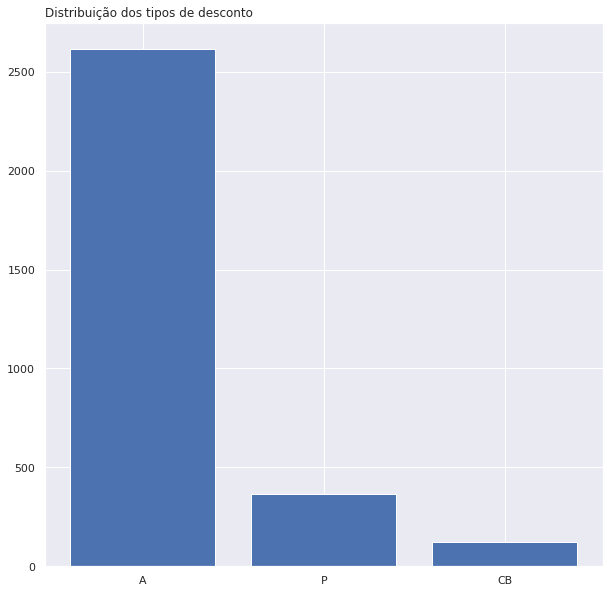

In [ ]:
fig = plt.figure(figsize=(10,10))
voucher_x = ['A', 'P', 'CB']
plt.bar(voucher_x, Base_Voucher_clean['tipo_desconto'].value_counts())
plt.title("Distribuição dos tipos de desconto", loc='left')
plt.show()

# Base Costumers Journey

In [ ]:
dfBase_Costumers_Journey = pd.read_excel('Base Customers_Journey.xlsx')

## Limpeza dos dados + Estatística Descritiva

Criando uma cópia do dataset

In [ ]:
Jornada_Cliente_clean = dfBase_Costumers_Journey.copy()

Verificando os dados do dataset

In [ ]:
Jornada_Cliente_clean.head()

,Unnamed: 0,id,entrance_type,created_at,updated_at,order_id,store_id,client_id,parent_id,domain_id,door_open_time,camera_analysis,description,camera_analysis_status,face_confidence
0,0,278403,exit_door,2022-01-01 00:00:45,2022-01-01 00:00:49,NaN,NaN,NaN,278401.0,9,2022-01-01 01:00:45,NaN,NaN,NaN,NaN
1,1,278404,order,2022-01-01 00:01:26,2022-01-01 00:01:26,1657878.0,NaN,NaN,278392.0,9,NaT,NaN,NaN,NaN,NaN
2,2,278405,exit_door,2022-01-01 00:02:36,2022-01-01 00:02:40,NaN,NaN,NaN,278392.0,9,2022-01-01 04:02:36,NaN,NaN,NaN,NaN
3,3,278406,NaN,2022-01-01 00:03:15,2022-01-01 00:08:18,NaN,5122.0,364081.0,NaN,9,NaT,Sem Problemas,NaN,PAGO,NaN
4,4,278407,entrance_door,2022-01-01 00:03:15,2022-01-01 00:03:19,NaN,NaN,NaN,278406.0,9,2022-01-01 04:03:15,NaN,NaN,NaN,NaN


Verificando o tamanho do dataset


In [ ]:
Jornada_Cliente_clean.shape

(370961, 15)

Verficando se há dados duplicados

In [ ]:
Jornada_Cliente_clean.duplicated().sum()

0

Verificando a quantidade de nulos

In [ ]:
Jornada_Cliente_clean.isnull().sum()

Unnamed: 0                     0
id                             0
entrance_type              91291
created_at                     0
updated_at                     0
order_id                  289552
store_id                  279670
client_id                 279671
parent_id                  91291
domain_id                      0
door_open_time            207895
camera_analysis           324429
description               367851
camera_analysis_status    292337
face_confidence           370961
dtype: int64

Excluindo as colunas que não terão utilidades até o momento

In [ ]:
Jornada_Cliente_clean = Jornada_Cliente_clean.drop(Jornada_Cliente_clean[['Unnamed: 0', 'domain_id', 'door_open_time','camera_analysis', 'description', 'camera_analysis_status',  'face_confidence', 'updated_at' ]], axis=1)

Verificando o dataset após a exclusão dos dados

In [ ]:
Jornada_Cliente_clean

,id,entrance_type,created_at,order_id,store_id,client_id,parent_id
0,278403,exit_door,2022-01-01 00:00:45,NaN,NaN,NaN,278401.0
1,278404,order,2022-01-01 00:01:26,1657878.0,NaN,NaN,278392.0
2,278405,exit_door,2022-01-01 00:02:36,NaN,NaN,NaN,278392.0
3,278406,NaN,2022-01-01 00:03:15,NaN,5122.0,364081.0,NaN
4,278407,entrance_door,2022-01-01 00:03:15,NaN,NaN,NaN,278406.0
...,...,...,...,...,...,...,...
370956,649376,entrance_door,2022-06-30 23:58:49,NaN,NaN,NaN,649375.0
370957,649377,NaN,2022-06-30 23:59:34,NaN,10086.0,697498.0,NaN
370958,649378,order,2022-06-30 23:59:34,2119741.0,NaN,NaN,649377.0
370959,649379,NaN,2022-06-30 23:59:37,NaN,4826.0,482291.0,NaN


Verificando o tamanho após a exclusão dos dados

In [ ]:
Jornada_Cliente_clean.shape

(370961, 7)

Verificando o tipo das variáveis

In [ ]:
Jornada_Cliente_clean.dtypes

id                        int64
entrance_type            object
created_at       datetime64[ns]
order_id                float64
store_id                float64
client_id               float64
parent_id               float64
dtype: object

Verificando a quantidade de dados nulos

In [ ]:
Jornada_Cliente_clean.isnull().sum()

id                    0
entrance_type     91291
created_at            0
order_id         289552
store_id         279670
client_id        279671
parent_id         91291
dtype: int64

## Ajustando o dataset para melhor visualização

In [ ]:
compra = Jornada_Cliente_clean[Jornada_Cliente_clean.entrance_type.isna()]

In [ ]:
compra.head()

,id,entrance_type,created_at,order_id,store_id,client_id,parent_id
3,278406,NaN,2022-01-01 00:03:15,NaN,5122.0,364081.0,NaN
6,278409,NaN,2022-01-01 00:05:33,NaN,4826.0,281299.0,NaN
20,278423,NaN,2022-01-01 00:10:47,NaN,4677.0,244315.0,NaN
23,278426,NaN,2022-01-01 00:13:14,NaN,5122.0,364086.0,NaN
27,278430,NaN,2022-01-01 00:29:01,NaN,6980.0,364088.0,NaN


Transformando as variáveis nulas em variáveis úteis para um merge futuro

In [ ]:
compra['entrance_type'] = compra["entrance_type"].fillna("buy")

In [ ]:
compra = compra.drop('parent_id',axis=1)

In [ ]:
compra = compra.rename(columns={'id':'parent_id'})

In [ ]:
compra['parent_id'] = compra['parent_id'].astype(float)

In [ ]:
compra.head()

,parent_id,entrance_type,created_at,order_id,store_id,client_id
3,278406.0,buy,2022-01-01 00:03:15,NaN,5122.0,364081.0
6,278409.0,buy,2022-01-01 00:05:33,NaN,4826.0,281299.0
20,278423.0,buy,2022-01-01 00:10:47,NaN,4677.0,244315.0
23,278426.0,buy,2022-01-01 00:13:14,NaN,5122.0,364086.0
27,278430.0,buy,2022-01-01 00:29:01,NaN,6980.0,364088.0


In [ ]:
Jornada_Cliente_clean = Jornada_Cliente_clean.dropna(subset=['entrance_type'])

In [ ]:
Jornada_Cliente_clean

,id,entrance_type,created_at,order_id,store_id,client_id,parent_id
0,278403,exit_door,2022-01-01 00:00:45,NaN,NaN,NaN,278401.0
1,278404,order,2022-01-01 00:01:26,1657878.0,NaN,NaN,278392.0
2,278405,exit_door,2022-01-01 00:02:36,NaN,NaN,NaN,278392.0
4,278407,entrance_door,2022-01-01 00:03:15,NaN,NaN,NaN,278406.0
5,278408,entrance_door,2022-01-01 00:03:16,NaN,NaN,NaN,278406.0
...,...,...,...,...,...,...,...
370953,649373,entrance_door,2022-06-30 23:57:59,NaN,NaN,NaN,649372.0
370954,649374,entrance_door,2022-06-30 23:58:00,NaN,NaN,NaN,649372.0
370956,649376,entrance_door,2022-06-30 23:58:49,NaN,NaN,NaN,649375.0
370958,649378,order,2022-06-30 23:59:34,2119741.0,NaN,NaN,649377.0


## Data set ajustado: Jornada_merge

In [ ]:
Jornada_merge = compra.merge(Jornada_Cliente_clean, how='inner', on='parent_id')

Verificando o tamanho do dataset

In [ ]:
Jornada_merge.shape

(279600, 12)

In [ ]:
Jornada_merge.head()

,parent_id,entrance_type_x,created_at_x,order_id_x,store_id_x,client_id_x,id,entrance_type_y,created_at_y,order_id_y,store_id_y,client_id_y
0,278406.0,buy,2022-01-01 00:03:15,NaN,5122.0,364081.0,278407,entrance_door,2022-01-01 00:03:15,NaN,NaN,NaN
1,278406.0,buy,2022-01-01 00:03:15,NaN,5122.0,364081.0,278408,entrance_door,2022-01-01 00:03:16,NaN,NaN,NaN
2,278406.0,buy,2022-01-01 00:03:15,NaN,5122.0,364081.0,278417,order,2022-01-01 00:06:09,1657879.0,NaN,NaN
3,278406.0,buy,2022-01-01 00:03:15,NaN,5122.0,364081.0,278418,exit_door,2022-01-01 00:07:25,NaN,NaN,NaN
4,278409.0,buy,2022-01-01 00:05:33,NaN,4826.0,281299.0,278410,entrance_door,2022-01-01 00:05:33,NaN,NaN,NaN


Removendo as horas e algumas colunas não necessárias

In [ ]:
Jornada_merge['created_at_x'] = pd.to_datetime(Jornada_merge['created_at_x']).dt.normalize()
Jornada_merge['created_at_y'] = pd.to_datetime(Jornada_merge['created_at_y']).dt.normalize()
Jornada_merge = Jornada_merge.drop('id', axis=1)
Jornada_merge = Jornada_merge.drop('order_id_x', axis=1)
Jornada_merge = Jornada_merge.drop('store_id_y', axis=1)
Jornada_merge = Jornada_merge.drop('client_id_y', axis=1)
Jornada_merge.head()

,parent_id,entrance_type_x,created_at_x,store_id_x,client_id_x,entrance_type_y,created_at_y,order_id_y
0,278406.0,buy,2022-01-01,5122.0,364081.0,entrance_door,2022-01-01,NaN
1,278406.0,buy,2022-01-01,5122.0,364081.0,entrance_door,2022-01-01,NaN
2,278406.0,buy,2022-01-01,5122.0,364081.0,order,2022-01-01,1657879.0
3,278406.0,buy,2022-01-01,5122.0,364081.0,exit_door,2022-01-01,NaN
4,278409.0,buy,2022-01-01,4826.0,281299.0,entrance_door,2022-01-01,NaN


Verificando que há problemas com dados duplicados (*já informado para a empresa*)


In [ ]:
duplicados_jornada = Jornada_merge.duplicated().sum()
duplicados_jornada

60367

In [ ]:
entrada = Jornada_merge[Jornada_merge.entrance_type_y == 'entrance_door'].duplicated().sum()
entrada

33718

In [ ]:
saida = Jornada_merge[Jornada_merge.entrance_type_y == 'exit_door'].duplicated().sum()
saida

26443

In [ ]:
ordem = Jornada_merge[Jornada_merge.entrance_type_y == 'order'].duplicated().sum()
ordem

175

In [ ]:
ordem_manual = Jornada_merge[Jornada_merge.entrance_type_y == 'manual_order'].duplicated().sum()
ordem_manual

31

In [ ]:
ent     = round((((33718-279600)/279600) * 100) + 100,2)
sai     = round((((26443-279600)/279600) * 100) + 100,2)
ord     = round((((175-279600)/279600) * 100) + 100,2)
manual  = round((((31-279600)/279600) * 100) + 100,2)

Gráfico da quantidade de dados duplicados

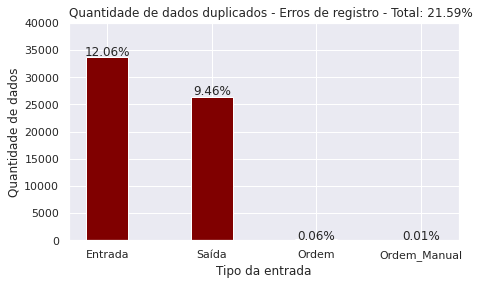

In [ ]:
duplicados = {'Entrada':33718, 'Saída':26443, 'Ordem':175, 'Ordem_Manual':31}
dupli = list(duplicados.keys())
valores = list(duplicados.values())
perc = [ent, sai, ord, manual]
  
fig = plt.figure(figsize = (7, 4))
 
# creating the bar plot
grafico = plt.bar(dupli, valores, color ='maroon', width = 0.4)
plt.xlabel("Tipo da entrada")
plt.ylabel("Quantidade de dados")
plt.title("Quantidade de dados duplicados - Erros de registro - Total: 21.59%", loc='left')
plt.axis(ymin=0 , ymax=40000)



i = 0
for p in grafico:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2, y+height*1.01, str(perc[i])+'%', ha='center')
    i+=1

plt.show()

In [ ]:
print(round(duplicados_jornada/279600 * 100,2))

21.59


Removendo os duplicados

In [ ]:
Jornada_merge = Jornada_merge.drop_duplicates()

In [ ]:
Jornada_merge['parent_id'].value_counts()

624650.0    48
407398.0    31
319789.0    28
647914.0    26
353514.0    21
            ..
468722.0     1
468679.0     1
468669.0     1
468641.0     1
649379.0     1
Name: parent_id, Length: 91291, dtype: int64

Verificando o tamanho do dataset após a remoção dos duplicados

In [ ]:
Jornada_merge.shape

(219233, 8)

In [ ]:
Jornada_merge.head()

,parent_id,entrance_type_x,created_at_x,store_id_x,client_id_x,entrance_type_y,created_at_y,order_id_y
0,278406.0,buy,2022-01-01,5122.0,364081.0,entrance_door,2022-01-01,NaN
2,278406.0,buy,2022-01-01,5122.0,364081.0,order,2022-01-01,1657879.0
3,278406.0,buy,2022-01-01,5122.0,364081.0,exit_door,2022-01-01,NaN
4,278409.0,buy,2022-01-01,4826.0,281299.0,entrance_door,2022-01-01,NaN
11,278409.0,buy,2022-01-01,4826.0,281299.0,order,2022-01-01,1657880.0


Renomeando e removendo colunas

In [ ]:
Jornada_merge = Jornada_merge.rename(columns={'order_id_y':'pedido_id'})
Jornada_merge = Jornada_merge.drop('entrance_type_x', axis=1)
Jornada_merge = Jornada_merge.drop('created_at_x', axis=1)

In [ ]:
Jornada_merge = Jornada_merge.rename(columns={'store_id_x':'store_id', })
Jornada_merge = Jornada_merge.rename(columns={'client_id_x':'client_id', })
Jornada_merge = Jornada_merge.rename(columns={'entrance_type_y':'entrance_type', })
Jornada_merge = Jornada_merge.rename(columns={'created_at_y':'created_at', })

In [ ]:
Jornada_merge.head()

,parent_id,store_id,client_id,entrance_type,created_at,pedido_id
0,278406.0,5122.0,364081.0,entrance_door,2022-01-01,NaN
2,278406.0,5122.0,364081.0,order,2022-01-01,1657879.0
3,278406.0,5122.0,364081.0,exit_door,2022-01-01,NaN
4,278409.0,4826.0,281299.0,entrance_door,2022-01-01,NaN
11,278409.0,4826.0,281299.0,order,2022-01-01,1657880.0


# Base Jornada + Produtos Vendidos (jorn_prod)

Juntando as duas bases de dados que serão necessárias para o processo de clusterização

In [ ]:
jorn_prod = Jornada_merge.merge(Base_Prod_Vend_clean, how='inner', on='pedido_id')

In [ ]:
jorn_prod.head()

,parent_id,store_id,client_id,entrance_type,created_at_x,pedido_id,id,produto_id,nome,sku,preco,descricao,categoria,em_promocao,preco_promocional,quantidade,created_at_y,updated_at,deleted_at
0,278406.0,5122.0,364081.0,order,2022-01-01,1657879.0,4030817.0,1629845.0,Cerveja Spaten Munich Lata 350ml,21069090,5.49,NaN,CERVEJAS,False,NaN,1.0,2022-01-01 03:06:06,2022-01-01 03:06:06,NaT
1,278406.0,5122.0,364081.0,order,2022-01-01,1657879.0,4030816.0,1629440.0,Cerveja Brahma Duplo Malte 350 Ml,21069090,3.99,NaN,CERVEJAS,False,NaN,5.0,2022-01-01 03:06:06,2022-01-01 03:06:06,NaT
2,278409.0,4826.0,281299.0,order,2022-01-01,1657880.0,4030819.0,1552021.0,Cerveja Budweiser 269 Ml,21069090,4.32,NaN,CERVEJAS,False,NaN,1.0,2022-01-01 03:09:07,2022-01-01 03:09:07,NaT
3,278409.0,4826.0,281299.0,order,2022-01-01,1657880.0,4030818.0,1760004.0,Biscoito Wafer Bauducco Chocolate 78g,19053200,1.99,NaN,MERCEARIA,False,NaN,1.0,2022-01-01 03:09:07,2022-01-01 03:09:07,NaT
4,278426.0,5122.0,364086.0,order,2022-01-01,1657881.0,4030820.0,1594914.0,Gin Gordons London Dry 750 Ml,21069090,99.00,NaN,ALCOOLICOS,False,NaN,1.0,2022-01-01 03:14:59,2022-01-01 03:14:59,NaT


In [ ]:
jorn_prod['pedido_id'].value_counts()

1690389.0    72
1722237.0    42
1690388.0    36
2055101.0    34
1758280.0    27
             ..
1800737.0     1
1991842.0     1
1800734.0     1
1800740.0     1
2004866.0     1
Name: pedido_id, Length: 80874, dtype: int64

Removendo colunas que não serão necessárias para o modelo

In [ ]:
jorn_prod = jorn_prod.drop(['created_at_y', 'updated_at', 'deleted_at', 'id', 'sku'], axis=1)
jorn_prod.head()

,parent_id,store_id,client_id,entrance_type,created_at_x,pedido_id,produto_id,nome,preco,descricao,categoria,em_promocao,preco_promocional,quantidade
0,278406.0,5122.0,364081.0,order,2022-01-01,1657879.0,1629845.0,Cerveja Spaten Munich Lata 350ml,5.49,NaN,CERVEJAS,False,NaN,1.0
1,278406.0,5122.0,364081.0,order,2022-01-01,1657879.0,1629440.0,Cerveja Brahma Duplo Malte 350 Ml,3.99,NaN,CERVEJAS,False,NaN,5.0
2,278409.0,4826.0,281299.0,order,2022-01-01,1657880.0,1552021.0,Cerveja Budweiser 269 Ml,4.32,NaN,CERVEJAS,False,NaN,1.0
3,278409.0,4826.0,281299.0,order,2022-01-01,1657880.0,1760004.0,Biscoito Wafer Bauducco Chocolate 78g,1.99,NaN,MERCEARIA,False,NaN,1.0
4,278426.0,5122.0,364086.0,order,2022-01-01,1657881.0,1594914.0,Gin Gordons London Dry 750 Ml,99.00,NaN,ALCOOLICOS,False,NaN,1.0


In [ ]:
jorn_prod = jorn_prod.drop('descricao', axis=1)
jorn_prod = jorn_prod.rename(columns={'created_at_x':'created_at', })

Criando novas colunas para utilizar no modelo

In [ ]:
jorn_prod['preco_qtd'] = jorn_prod['preco'] * jorn_prod['quantidade']

In [ ]:
jorn_prod['preco_qtd_promo'] = jorn_prod['preco_promocional'] * jorn_prod['quantidade']

In [ ]:
jorn_prod.head()

,parent_id,store_id,client_id,entrance_type,created_at,pedido_id,produto_id,nome,preco,categoria,em_promocao,preco_promocional,quantidade,preco_qtd,preco_qtd_promo
0,278406.0,5122.0,364081.0,order,2022-01-01,1657879.0,1629845.0,Cerveja Spaten Munich Lata 350ml,5.49,CERVEJAS,False,NaN,1.0,5.49,NaN
1,278406.0,5122.0,364081.0,order,2022-01-01,1657879.0,1629440.0,Cerveja Brahma Duplo Malte 350 Ml,3.99,CERVEJAS,False,NaN,5.0,19.95,NaN
2,278409.0,4826.0,281299.0,order,2022-01-01,1657880.0,1552021.0,Cerveja Budweiser 269 Ml,4.32,CERVEJAS,False,NaN,1.0,4.32,NaN
3,278409.0,4826.0,281299.0,order,2022-01-01,1657880.0,1760004.0,Biscoito Wafer Bauducco Chocolate 78g,1.99,MERCEARIA,False,NaN,1.0,1.99,NaN
4,278426.0,5122.0,364086.0,order,2022-01-01,1657881.0,1594914.0,Gin Gordons London Dry 750 Ml,99.00,ALCOOLICOS,False,NaN,1.0,99.00,NaN


In [ ]:
jorn_prod.dtypes

parent_id                   float64
store_id                    float64
client_id                   float64
entrance_type                object
created_at           datetime64[ns]
pedido_id                   float64
produto_id                  float64
nome                         object
preco                       float64
categoria                    object
em_promocao                    bool
preco_promocional           float64
quantidade                  float64
preco_qtd                   float64
preco_qtd_promo             float64
dtype: object

In [ ]:
jorn_prod['categoria'].value_counts()

SOFT DRINKS          36774
BOMBONIERE           33329
CERVEJAS             21594
MERCEARIA            20722
SNACKS               16733
CONGELADOS           15060
TABACARIA             8430
PERECÍVEIS            7053
ALCOOLICOS            5323
HIGIENE E LIMPEZA     3780
PRODUTOS GERAIS       1768
ACESSORIOS              41
Name: categoria, dtype: int64

Verificando os 10 produtos mais vendidos

In [ ]:
mais_vendidos = jorn_prod[['nome']]
mais_vendidos.head()

,nome
0,Cerveja Spaten Munich Lata 350ml
1,Cerveja Brahma Duplo Malte 350 Ml
2,Cerveja Budweiser 269 Ml
3,Biscoito Wafer Bauducco Chocolate 78g
4,Gin Gordons London Dry 750 Ml


In [ ]:
contagem = pd.DataFrame(mais_vendidos.nome.value_counts()).reset_index()
contagem.head(10)

,index,nome
0,Cerveja Heineken Long Neck 330 Ml,3073
1,Água Crystal Sem GÁs 500 Ml,1821
2,Cerveja Corona Extra Long Neck 330 Ml,1606
3,Refri Coca-cola 2 L,1418
4,Cigarro Dunhill Carlton,1328
5,Cerveja Spaten Munich Lata 350ml,1200
6,"Água Crystal Sem GÁs 1,5 L",1145
7,Água Crystal Com GÁs 500 Ml,1142
8,Refri Coca-cola Pet 600 Ml,1042
9,Cerveja Brahma Duplo Malte 350 Ml,911


In [ ]:
contagem.columns = ['Produtos', 'Quantidade']
contagem_10 = contagem.head(10)

In [ ]:
contagem_10['Quantidade'] = contagem_10['Quantidade'].astype('object')

In [ ]:
contagem_10.dtypes

Produtos      object
Quantidade    object
dtype: object

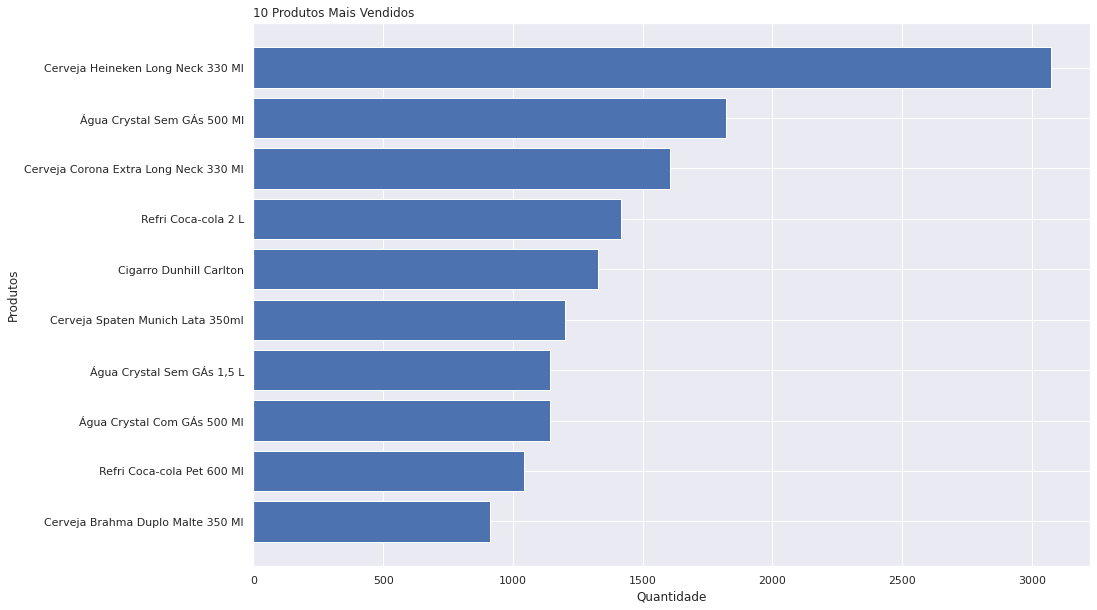

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.barh(contagem_10['Produtos'], contagem_10['Quantidade'])
plt.title("10 Produtos Mais Vendidos", loc='left')
plt.ylabel('Produtos')
plt.xlabel('Quantidade')
plt.gca().invert_yaxis()
plt.show()

Correlação entre as variáveis

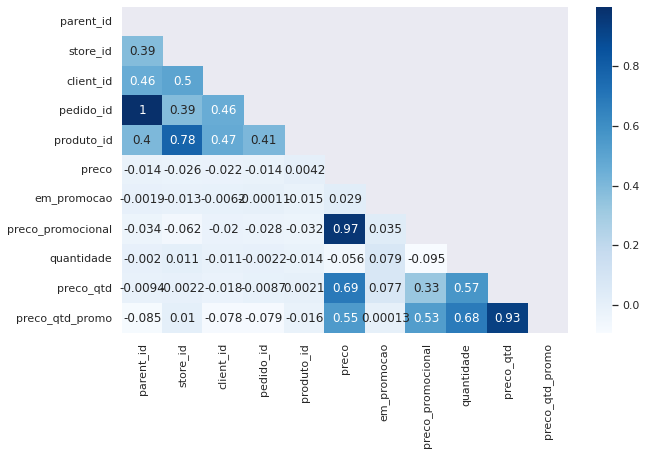

In [ ]:
plt.figure(figsize=(10,6))

mask = np.triu(np.ones_like(jorn_prod.corr(),dtype=bool))
sns.heatmap(jorn_prod.corr(), cmap='Blues', mask=mask, square=False,annot=True);

# Análises Relevantes

## Crescimento de clientes por mês

In [ ]:
Base_Clientes_clean.head()

,id,user_id,created_at,updated_at,codigo_promocional,banido,ativo,cadastro_localizacao,banido_job
0,172909.0,241327.0,2020-09-09,2021-05-03,REN1V,False,True,NaN,False
1,172910.0,241328.0,2020-09-09,2022-05-06,JOA3F,False,True,NaN,False
2,172942.0,241380.0,2020-09-10,2022-06-21,TES10M,False,True,NaN,False
3,172960.0,241404.0,2020-09-10,2021-05-03,WEL183,False,True,NaN,False
4,172990.0,241474.0,2020-09-10,2021-05-03,JUL028,False,True,NaN,False


In [ ]:
clientes = Base_Clientes_clean[['user_id', 'created_at']]
clientes.head(1)

,user_id,created_at
0,241327.0,2020-09-09


In [ ]:
jan     = round(((40512-37332)/37332) * 100,2)
fev     = round(((45746-40512)/40512) * 100,2)
mar     = round(((51072-45746)/45746) * 100,2)
abr     = round(((56078-51072)/51072) * 100,2)
mai     = round(((60245-56078)/56078) * 100,2)
jun     = round(((66308-60245)/60245) * 100,2)
clientes_x = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun']
clientes_y = [40512, 45746, 51072, 56078, 60245, 66308]
clientes_y_perc = [jan, fev, mar, abr, mai, jun]

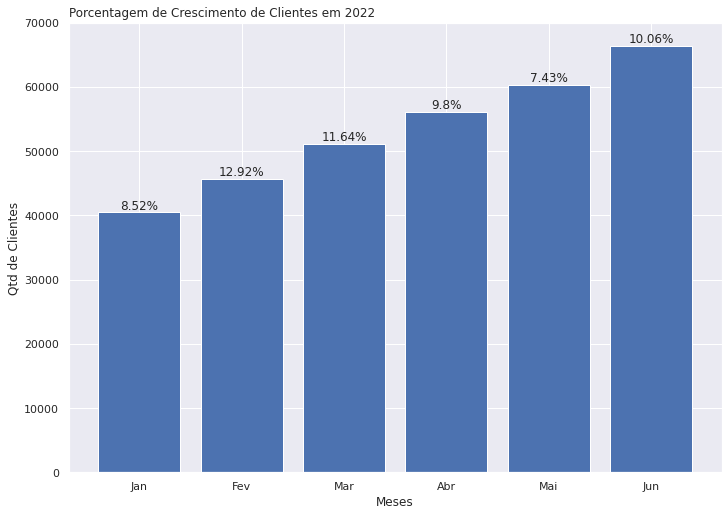

In [ ]:
graph = plt.bar(clientes_x, clientes_y)
plt.title('Porcentagem de Crescimento de Clientes em 2022', loc='left')
plt.ylabel('Qtd de Clientes')
plt.xlabel('Meses')
plt.axis(ymin=0 , ymax=70000)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2, y+height*1.01, str(clientes_y_perc[i])+'%', ha='center')
    i+=1

plt.show()

# Aplicando o modelo - KMeans

## Aplicando o modelo RFV (Recência, Frequência, Valor)

In [ ]:
df = jorn_prod.copy()

In [ ]:
df.head()

,parent_id,store_id,client_id,entrance_type,created_at,pedido_id,produto_id,nome,preco,categoria,em_promocao,preco_promocional,quantidade,preco_qtd,preco_qtd_promo
0,278406.0,5122.0,364081.0,order,2022-01-01,1657879.0,1629845.0,Cerveja Spaten Munich Lata 350ml,5.49,CERVEJAS,False,NaN,1.0,5.49,NaN
1,278406.0,5122.0,364081.0,order,2022-01-01,1657879.0,1629440.0,Cerveja Brahma Duplo Malte 350 Ml,3.99,CERVEJAS,False,NaN,5.0,19.95,NaN
2,278409.0,4826.0,281299.0,order,2022-01-01,1657880.0,1552021.0,Cerveja Budweiser 269 Ml,4.32,CERVEJAS,False,NaN,1.0,4.32,NaN
3,278409.0,4826.0,281299.0,order,2022-01-01,1657880.0,1760004.0,Biscoito Wafer Bauducco Chocolate 78g,1.99,MERCEARIA,False,NaN,1.0,1.99,NaN
4,278426.0,5122.0,364086.0,order,2022-01-01,1657881.0,1594914.0,Gin Gordons London Dry 750 Ml,99.00,ALCOOLICOS,False,NaN,1.0,99.00,NaN


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
parent_id,170607.0,4.602005e+05,107177.466621,278406.0,369497.00,456543.00,554606.00,649377.00
store_id,170607.0,6.727963e+03,2167.604493,3881.0,4677.00,5673.00,8815.00,12420.00
client_id,170607.0,4.282310e+05,149230.324762,173027.0,281399.00,438333.00,547084.00,700602.00
pedido_id,170607.0,1.907222e+06,128416.512809,1657879.0,1806154.00,1905935.00,2021185.50,2119741.00
produto_id,170607.0,2.185162e+06,670152.804127,542518.0,1594777.00,2298446.00,2742464.00,3654198.00
preco,170607.0,9.242643e+00,10.818457,0.0,3.99,6.99,10.00,259.00
preco_promocional,4497.0,8.157443e+00,10.001760,0.0,3.00,5.59,9.31,119.99
quantidade,170607.0,1.418043e+00,1.456600,0.0,1.00,1.00,1.00,144.00
preco_qtd,170607.0,1.221746e+01,17.285460,0.0,4.98,7.99,12.99,984.96
preco_qtd_promo,4497.0,1.342751e+01,19.989024,0.0,4.50,7.96,14.39,492.48


In [ ]:
df['valor'] = df['preco_qtd']

In [ ]:
df.loc[df['em_promocao'] == 1, 'valor'] = df['preco_qtd_promo']

In [ ]:
df.shape

(170607, 16)

In [ ]:
menor_data, maior_data = df['created_at'].min(), df['created_at'].max() # Obtemos o dia da primeira e da última compra
maior_data = maior_data + pd.DateOffset(days=1) # Agora, adicionamos um dia à maior compra para iniciarmos a análise.

In [ ]:
df.groupby('created_at')[['valor']].sum().sort_values('valor', ascending=False)

,valor
created_at,
2022-06-18,32727.92
2022-06-16,30906.74
2022-02-28,29207.69
2022-03-18,28282.84
2022-03-19,27269.22
...,...
2022-02-08,3816.07
2022-02-07,3783.41
2022-01-06,3576.90


In [ ]:
tabela_rfm = df.groupby('client_id').agg({'created_at': lambda date: (maior_data - date.max()).days,
                                        'parent_id': lambda num: len(num),
                                        'valor': lambda valor: valor.sum()})
tabela_rfm.sort_values('valor', ascending=False)

,created_at,parent_id,valor
client_id,,,
371602.0,3,821,16278.52
248612.0,1,767,9418.53
217131.0,1,786,9252.62
256546.0,1,469,8246.35
262934.0,2,382,5639.95
...,...,...,...
684329.0,9,1,1.00
506006.0,108,1,1.00
508064.0,107,1,1.00


In [ ]:
tabela_rfm.columns=['Recência','Frequência','Valor']

In [ ]:
tabela_rfm.head()

,Recência,Frequência,Valor
client_id,,,
173027.0,157,1,4.99
173276.0,112,1,31.96
173300.0,2,72,727.03
173336.0,2,38,541.60
173362.0,1,35,216.49


In [ ]:
tabela_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 15876 entries, 173027.0 to 700602.0
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Recência    15876 non-null  int64  
 1   Frequência  15876 non-null  int64  
 2   Valor       15876 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 496.1 KB


In [ ]:
df_kmeans = tabela_rfm.copy()

In [ ]:
df_kmeans.head()

,Recência,Frequência,Valor
client_id,,,
173027.0,157,1,4.99
173276.0,112,1,31.96
173300.0,2,72,727.03
173336.0,2,38,541.60
173362.0,1,35,216.49


In [ ]:
scaler = StandardScaler()
df_norm_kmeans = scaler.fit_transform(df_kmeans)

In [ ]:
inertias = []
K = range(1, 10)
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_norm_kmeans)
    inertias.append(kmeanModel.inertia_)

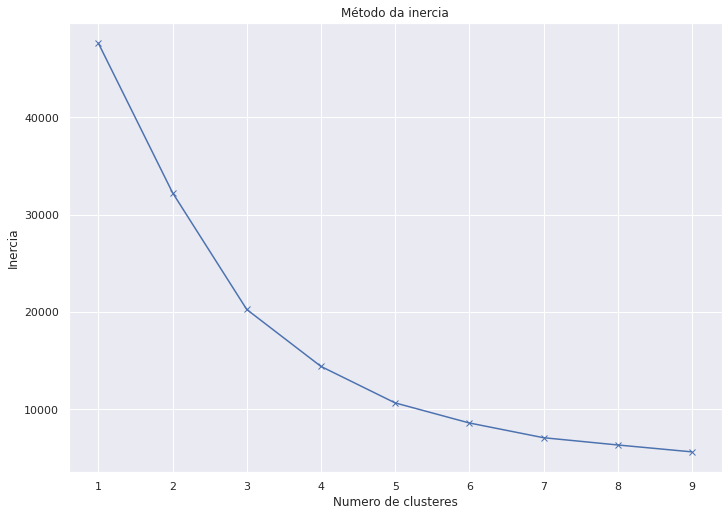

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Numero de clusteres')
plt.ylabel('Inercia')
plt.title('Método da inercia')
plt.show()

## Kmeans com 4 Clusters

In [ ]:
model = KMeans(4,random_state=42)
labels = model.fit_predict(df_norm_kmeans)

In [ ]:
df_kmeans['Clusters']= labels # aqui vamos atribuir pra cada cliente o seu devido cluster
df_kmeans['Clusters']= df_kmeans['Clusters'].astype(str)

In [ ]:
from sklearn.metrics import silhouette_score
X = df_kmeans.drop(columns=('Clusters'), axis=1)
model.fit_predict(X)
score = silhouette_score(X, model.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.777


In [ ]:
df_kmeans.head()

,Recência,Frequência,Valor,Clusters
client_id,,,,
173027.0,157,1,4.99,1
173276.0,112,1,31.96,1
173300.0,2,72,727.03,0
173336.0,2,38,541.60,2
173362.0,1,35,216.49,2


In [ ]:
df_kmeans['Clusters'].value_counts()

2    8978
1    6204
0     662
3      32
Name: Clusters, dtype: int64

In [ ]:
medidas = ['count', 'min', 'mean', 'median', 'max']
colunas = ['Recência', 'Frequência', 'Valor']

agrup = df_kmeans.groupby(['Clusters'])

resumo_kmeans = agrup[colunas].agg(medidas)
resumo_kmeans

Recência                             Frequência                  \
            count min        mean median  max      count min        mean   
Clusters                                                                   
0             662   1   17.496979    7.0  170        662   6   78.261329   
1            6204  71  117.453417  111.0  181       6204   1    4.756770   
2            8978   1   27.616396   21.0   80       8978   1    8.729561   
3              32   1    5.093750    1.5   51         32  90  341.031250   

                     Valor                                            
         median  max count      min         mean    median       max  
Clusters                                                              
0          67.0  264   662   307.08  1011.030785   809.190   4044.04  
1           3.0   57  6204     1.00    55.719465    31.465   1008.80  
2           5.0   62  8978     1.00    99.302202    53.875    999.00  
3         277.5  821    32  1822.97  4600.333750  3861.180  16278.52

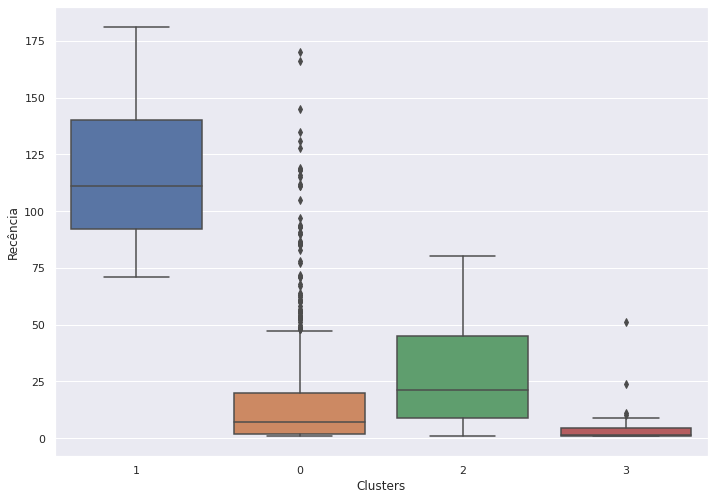

In [ ]:
sns.boxplot(x="Clusters", y="Recência", data=df_kmeans)

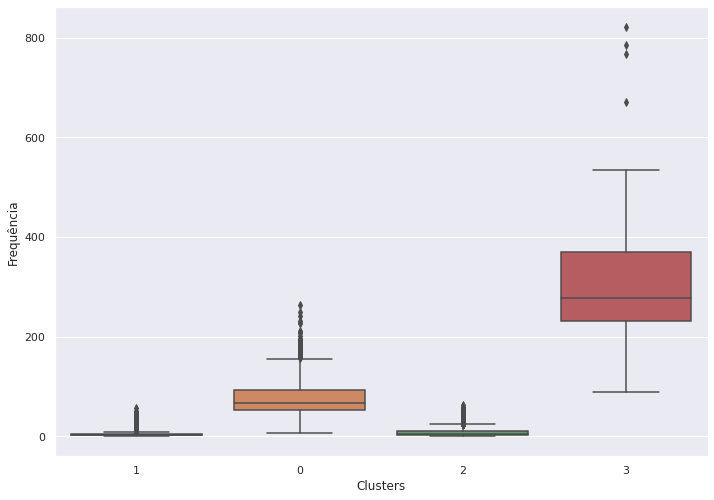

In [ ]:
sns.boxplot(x="Clusters", y="Frequência", data=df_kmeans)

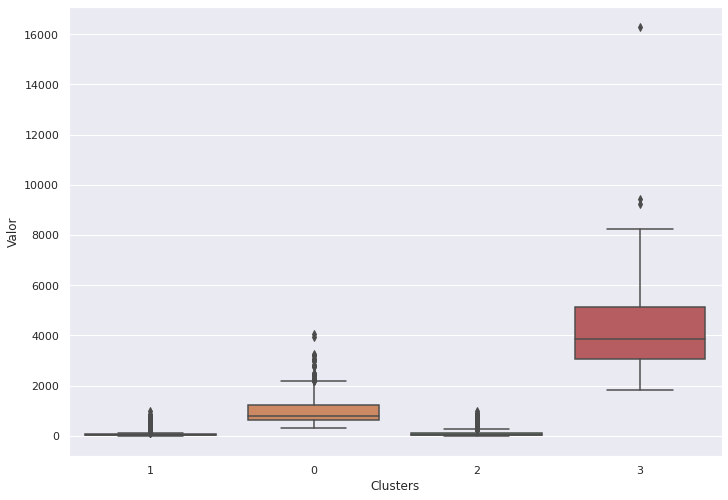

In [ ]:
sns.boxplot(x="Clusters", y="Valor", data=df_kmeans)

### Conclusão:

Cluster 0 (662 Clientes - 04,17%): Clientes que fizeram bastante compra, tendo gasto em média R$1011,00 reais, maior parte deles continuam frequentando as lojas, outros já não vão a mais de 30 dias.

Cluster 1 (6204 Clientes - 39,08%): Clientes que fizeram poucas compras, tendo gasto em média R$56,00 reais e não foram mais as lojas, tendo mais de 60 dias que não voltaram.

Cluster 2 (8978 Clientes - 56,55%): Clientes que fizeram poucas compras, tendo gasto em média R$99,00 reais, porém muitos não vão mais a loja.

Cluster 3 (32 Clientes - 0,2%): Clientes que fazem muitas compras, tendo gasto em média R$4600,00 reais, todos continuam frequentando as lojas.


In [ ]:
cluster4 = df_kmeans.groupby(['Clusters'])['Valor'].sum().reset_index()

In [ ]:
cluster4

,Clusters,Valor
0,0,669302.38
1,1,345683.56
2,2,891535.17
3,3,147210.68


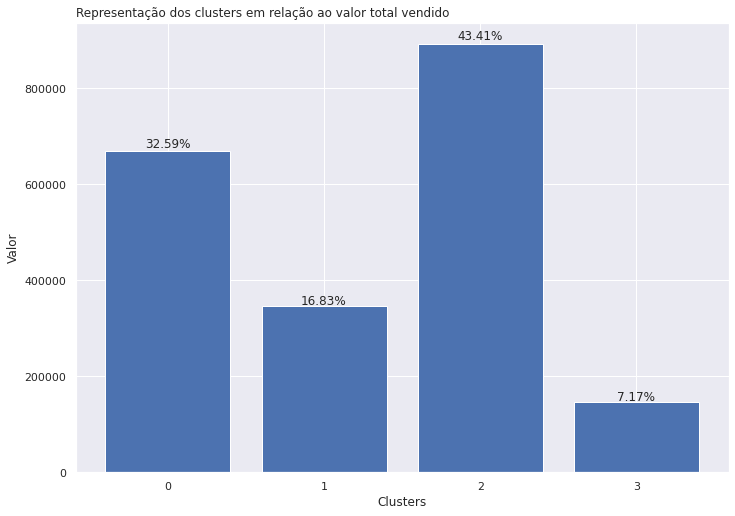

In [ ]:
graph_cluster4 = plt.bar(cluster4['Clusters'], cluster4['Valor'])
plt.title('Representação dos clusters em relação ao valor total vendido', loc='left')
plt.ylabel('Valor')
plt.xlabel('Clusters')

i = 0
for p in graph_cluster4:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2, y+height*1.01, str(round((((cluster4['Valor']-2053731.79)/2053731.79)+1)*100,2)[i])+'%', ha='center')
    i+=1

plt.show()

## Kmeans com 5 Clusters

In [ ]:
df_kmeans5 = tabela_rfm.copy()

In [ ]:
scaler = StandardScaler()
df_norm_kmeans5 = scaler.fit_transform(df_kmeans5)

In [ ]:
model5 = KMeans(5,random_state=42)
labels5 = model5.fit_predict(df_norm_kmeans5)

In [ ]:
df_kmeans5['Clusters']= labels5 # aqui vamos atribuir pra cada cliente o seu devido cluster
df_kmeans5['Clusters']= df_kmeans5['Clusters'].astype(str)

In [ ]:
from sklearn.metrics import silhouette_score
X = df_kmeans5.drop(columns=('Clusters'), axis=1)
model5.fit_predict(X)
score = silhouette_score(X, model5.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.736


In [ ]:
df_kmeans5.head()

,Recência,Frequência,Valor,Clusters
client_id,,,,
173027.0,157,1,4.99,3
173276.0,112,1,31.96,3
173300.0,2,72,727.03,2
173336.0,2,38,541.60,2
173362.0,1,35,216.49,0


In [ ]:
df_kmeans5['Clusters'].value_counts()

0    8587
3    6115
2    1034
1     134
4       6
Name: Clusters, dtype: int64

In [ ]:
medidas5 = ['count', 'min', 'mean', 'median', 'max']
colunas5 = ['Recência', 'Frequência', 'Valor']

agrup5 = df_kmeans5.groupby(['Clusters'])

resumo_kmeans5 = agrup5[colunas5].agg(medidas5)
resumo_kmeans5

Recência                             Frequência                   \
            count min        mean median  max      count  min        mean   
Clusters                                                                    
0            8587   1   28.496215   22.0   77       8587    1    7.150111   
1             134   1   12.589552    3.0  135        134    7  166.358209   
2            1034   1   19.533849   10.0  170       1034    3   52.354932   
3            6115  73  118.030090  112.0  181       6115    1    4.698937   
4               6   1    5.166667    1.0   24          6  469  674.666667   

                     Valor                                            
         median  max count      min         mean    median       max  
Clusters                                                              
0           4.0   40  8587     1.00    80.596527    48.930    713.94  
1         156.0  400   134   753.09  2272.595224  1987.785   5639.95  
2          47.0  147  1034   199.20   648.047418   555.270   2227.00  
3           3.0   47  6115     1.00    54.654224    31.540    849.15  
4         719.0  821     6  4286.12  8805.006667  8749.485  16278.52

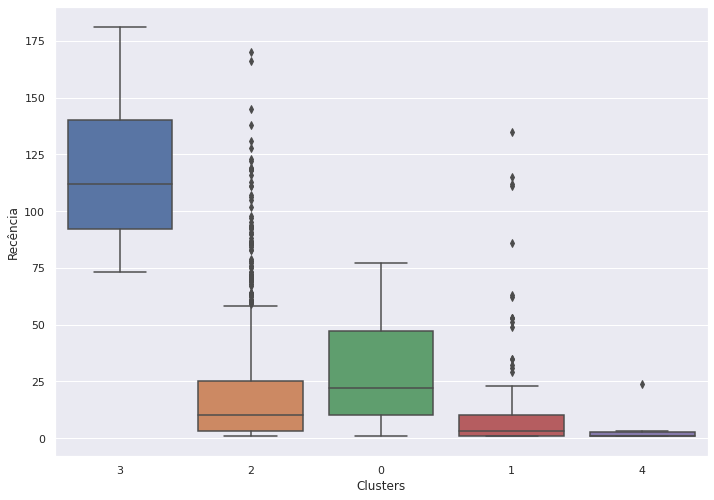

In [ ]:
sns.boxplot(x="Clusters", y="Recência", data=df_kmeans5)

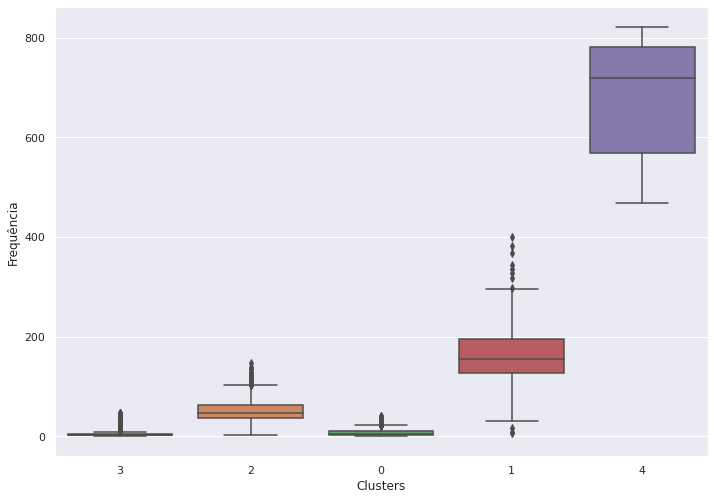

In [ ]:
sns.boxplot(x="Clusters", y="Frequência", data=df_kmeans5)

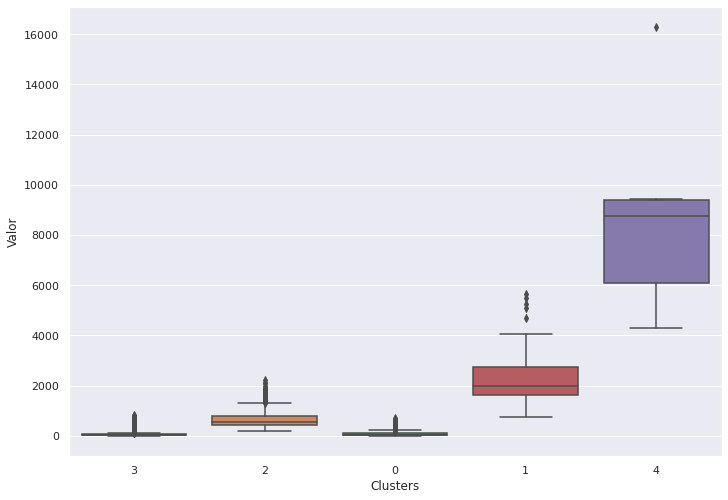

In [ ]:
sns.boxplot(x="Clusters", y="Valor", data=df_kmeans5)

### Conclusão:

Cluster 0 (8587 Clientes - 54,09%): Clientes que fizeram poucas compras, tendo gasto em média R$81,00 reais, porém muitos não vão mais a loja.

Cluster 1 (134 Clientes - 0,84%): Clientes que fizeram muitas compras, tendo gasto em média R$2273,00 reais, a maioria continua frequentando as lojas, porém 11,94% já não vão a mais de 30 dias. 

Cluster 2 (1034 Clientes - 06,51%): Clientes que fizeram algumas compras, tendo gasto em média R$648,00 reais, a maioria continua frequentando as lojas, porém 19,92% já não vão a mais de 30 dias.

Cluster 3 (6115 Clientes - 38,52%): Clientes que fizeram poucas compras, tendo gasto em média R$55,00 reais e não foram mais as lojas, tendo mais de 60 dias que não voltaram.


Cluster 4 (6 Clientes - 0,04%): Clientes que fizeram MUITAS compras, tendo gasto em média R$8805,00 reais, continuam frequentando a loja e somente um deles não vai a mais de 15 dias.

In [ ]:
cluster5 = df_kmeans5.groupby(['Clusters'])['Valor'].sum().reset_index()

In [ ]:
cluster5

,Clusters,Valor
0,0,692082.38
1,1,304527.76
2,2,670081.03
3,3,334210.58
4,4,52830.04


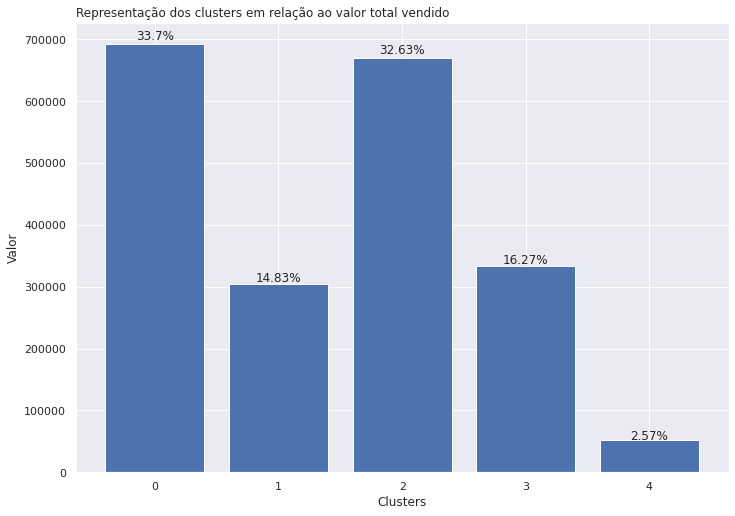

In [ ]:
graph_cluster5 = plt.bar(cluster5['Clusters'], cluster5['Valor'])
plt.title('Representação dos clusters em relação ao valor total vendido', loc='left')
plt.ylabel('Valor')
plt.xlabel('Clusters')

i = 0
for p in graph_cluster5:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2, y+height*1.01, str(round((((cluster5['Valor']-2053731.79)/2053731.79)+1)*100,2)[i])+'%', ha='center')
    i+=1

plt.show()

## Tratamento de Outliers

In [ ]:
df_outliers = tabela_rfm.copy()

In [ ]:
Q1=df_outliers['Valor'].quantile(0.25)
Q3=df_outliers['Valor'].quantile(0.75)
IQR=Q3-Q1
print("Q1", Q1)
print("Q3", Q3)
print("IQR", IQR)
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("Normal Range", lower_bound, "-", upper_bound)

Q1 20.0575
Q3 109.4325
IQR 89.375
Normal Range -114.005 - 243.495


In [ ]:
z=np.abs(stats.zscore(df_outliers.Valor))

In [ ]:
df_outliers[z>12].shape #removidos

(11, 3)

In [ ]:
df_outliers.shape #base antiga

(15876, 3)

In [ ]:
df_kmeans4_tratado = df_outliers[z<12].copy()
df_kmeans4_tratado.shape #base nova para 4 clusters

(15865, 3)

In [ ]:
df_kmeans5_tratado = df_outliers[z<12].copy()
df_kmeans5_tratado.shape #base nova para 5 clusters

(15865, 3)

In [ ]:
df_gm5_tratado = df_outliers[z<12].copy()
df_gm5_tratado.shape #base nova para 5 clusters com gaussian mixture

(15865, 3)

## Kmeans com 4 Clusers com tratamento de outliers

In [ ]:
scaler = StandardScaler()
df_norm_kmeans4_tratado = scaler.fit_transform(df_kmeans4_tratado)

In [ ]:
model4_out = KMeans(4,random_state=42)
labels4_out = model4_out.fit_predict(df_norm_kmeans4_tratado)

In [ ]:
df_kmeans4_tratado['Clusters']= labels4_out # aqui vamos atribuir pra cada cliente o seu devido cluster
df_kmeans4_tratado['Clusters']= df_kmeans4_tratado['Clusters'].astype(str)

In [ ]:
from sklearn.metrics import silhouette_score
X = df_kmeans4_tratado.drop(columns=('Clusters'), axis=1)
model4_out.fit_predict(X)
score = silhouette_score(X, model4_out.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.719


In [ ]:
df_kmeans4_tratado['Clusters'].value_counts()

0    8510
2    6090
1    1116
3     149
Name: Clusters, dtype: int64

In [ ]:
medidas4_out = ['count', 'min', 'mean', 'median', 'max']
colunas4_out = ['Recência', 'Frequência', 'Valor']

agrup4_out = df_kmeans4_tratado.groupby(['Clusters'])

resumo_kmeans4_out = agrup4_out[colunas4_out].agg(medidas4_out)
resumo_kmeans4_out

Recência                             Frequência                  \
            count min        mean median  max      count min        mean   
Clusters                                                                   
0            8510   1   28.594830   22.0   78       8510   1    6.958284   
1            1116   1   21.549283   11.0  170       1116   2   49.497312   
2            6090  72  118.080624  112.0  181       6090   1    4.587356   
3             149   1   12.127517    4.0  135        149   7  153.805369   

                     Valor                                          
         median  max count     min         mean    median      max  
Clusters                                                            
0           4.0   40  8510    1.00    77.996317    48.335   512.47  
1          45.0  147  1116  197.51   608.643593   530.990  2227.00  
2           3.0   45  6090    1.00    52.990836    31.270   757.98  
3         142.0  400   149  753.09  2073.658725  1862.500  4068.50

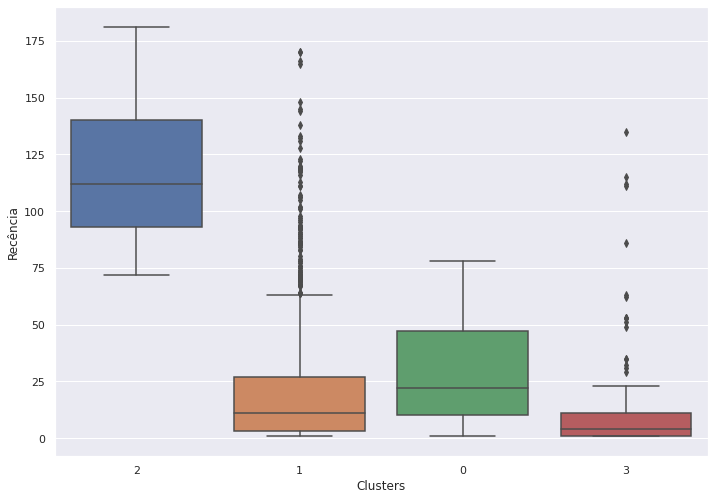

In [ ]:
sns.boxplot(x="Clusters", y="Recência", data=df_kmeans4_tratado)

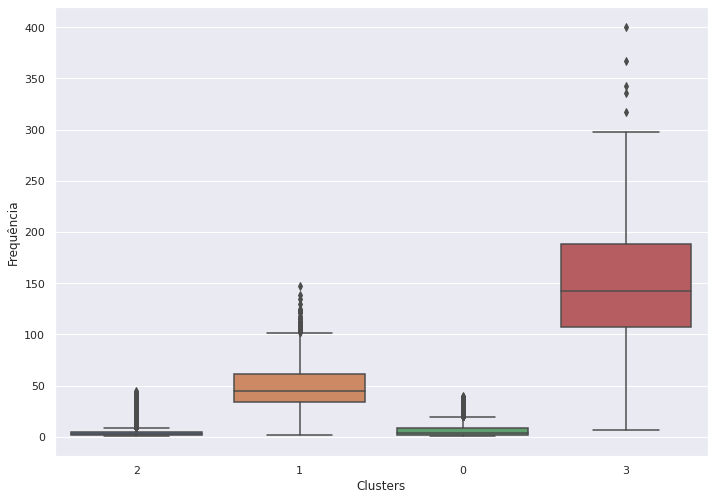

In [ ]:
sns.boxplot(x="Clusters", y="Frequência", data=df_kmeans4_tratado)

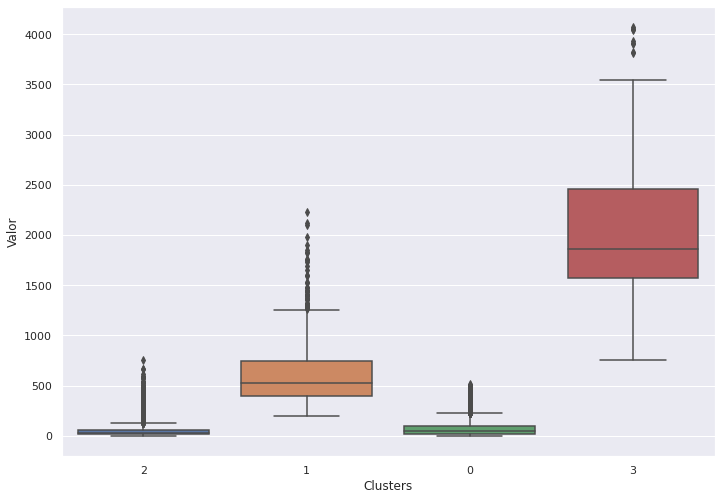

In [ ]:
sns.boxplot(x="Clusters", y="Valor", data=df_kmeans4_tratado)

### Conclusão:

Cluster 0 (8510 Clientes - 53,64%): Clientes que fizeram poucas compras, tendo gasto em média R$78,00 reais, porém muitos não vão mais a loja.

Cluster 1 (1116 Clientes - 07,03%): Clientes que fizeram bastante compra, tendo gasto em média R$609,00 reais, maior parte deles continuam frequentando as lojas, outros já não vão a mais de 30 dias.

Cluster 2 (6090 Clientes - 38,39%): Clientes que fizeram poucas compras, tendo gasto em média R$53,00 reais e não foram mais as lojas, tendo mais de 60 dias que não voltaram.

Cluster 3 (149 Clientes - 0,94%): Clientes que fazem muitas compras, tendo gasto em média R$2074,00 reais, a grande maioria continua frequentando as lojas.

In [ ]:
cluster4_tratado = df_kmeans4_tratado.groupby(['Clusters'])['Valor'].sum().reset_index()

In [ ]:
cluster4_tratado

,Clusters,Valor
0,0,663748.66
1,1,679246.25
2,2,322714.19
3,3,308975.15


In [ ]:
cluster4_tratado.Valor.sum()

1974684.25

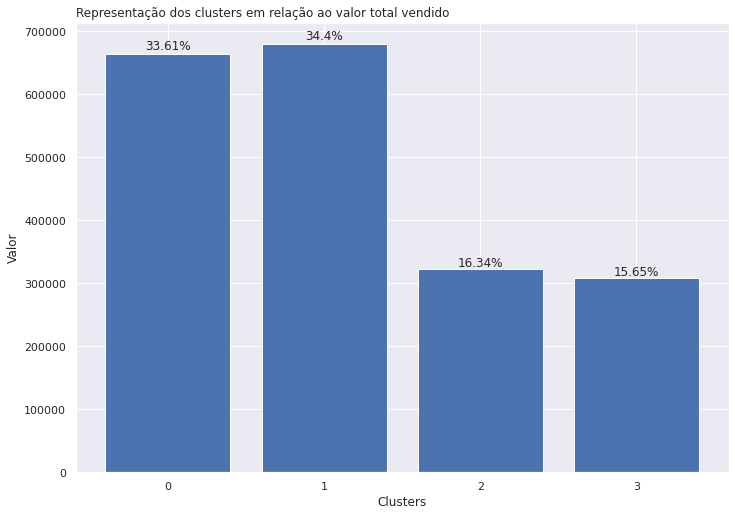

In [ ]:
graph_cluster4_tratado = plt.bar(cluster4_tratado['Clusters'], cluster4_tratado['Valor'])
plt.title('Representação dos clusters em relação ao valor total vendido', loc='left')
plt.ylabel('Valor')
plt.xlabel('Clusters')

i = 0
for p in graph_cluster4_tratado:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2, y+height*1.01, str(round((((cluster4_tratado['Valor']-1974684.25)/1974684.25)+1)*100,2)[i])+'%', ha='center')
    i+=1

plt.show()

## Kmeans com 5 Clusers com tratamento de outliers

In [ ]:
scaler = StandardScaler()
df_norm_kmeans5_tratado = scaler.fit_transform(df_kmeans5_tratado)

In [ ]:
model5_out = KMeans(5,random_state=42)
labels5_out = model5_out.fit_predict(df_norm_kmeans5_tratado)

In [ ]:
df_kmeans5_tratado['Clusters']= labels5_out # aqui vamos atribuir pra cada cliente o seu devido cluster
df_kmeans5_tratado['Clusters']= df_kmeans5_tratado['Clusters'].astype(str)

In [ ]:
from sklearn.metrics import silhouette_score
X = df_kmeans5_tratado.drop(columns=('Clusters'), axis=1)
model5_out.fit_predict(X)
score = silhouette_score(X, model5_out.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.604


In [ ]:
df_kmeans5_tratado['Clusters'].value_counts()

0    8101
1    6056
3    1345
4     295
2      68
Name: Clusters, dtype: int64

In [ ]:
medidas5_out = ['count', 'min', 'mean', 'median', 'max']
colunas5_out = ['Recência', 'Frequência', 'Valor']

agrup5_out = df_kmeans5_tratado.groupby(['Clusters'])

resumo_kmeans5_out = agrup5_out[colunas5_out].agg(medidas5_out)
resumo_kmeans5_out

Recência                             Frequência                  \
            count min        mean median  max      count min        mean   
Clusters                                                                   
0            8101   1   29.128750   22.0   76       8101   1    5.992470   
1            6056  73  118.282530  112.0  181       6056   1    4.548712   
2              68   1   11.455882    2.5  135         68  16  202.544118   
3            1345   1   22.556134   13.0  165       1345   2   36.556134   
4             295   1   16.613559    6.0  170        295   7   89.067797   

                     Valor                                           
         median  max count      min         mean    median      max  
Clusters                                                             
0           4.0   30  8101     1.00    67.068915    45.270   463.42  
1           3.0   47  6056     1.00    52.230963    31.165   665.97  
2         192.0  400    68  1238.68  2565.185588  2368.370  4068.50  
3          34.0   90  1345    93.41   434.098595   391.620  1352.76  
4          86.0  191   295   433.13  1209.332305  1103.350  3210.10

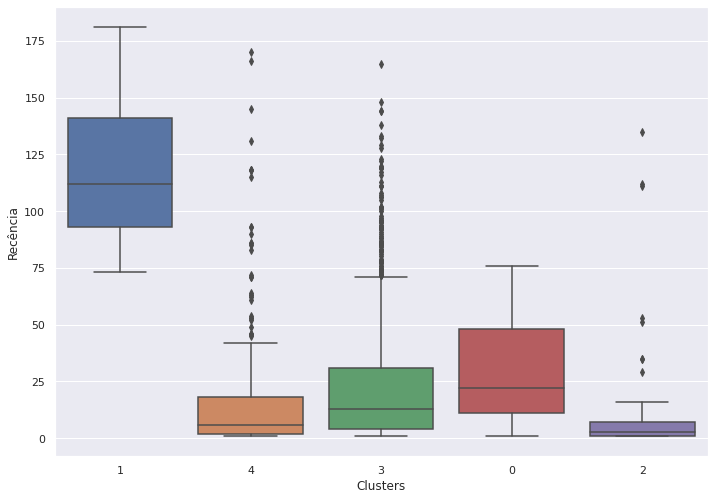

In [ ]:
sns.boxplot(x="Clusters", y="Recência", data=df_kmeans5_tratado)

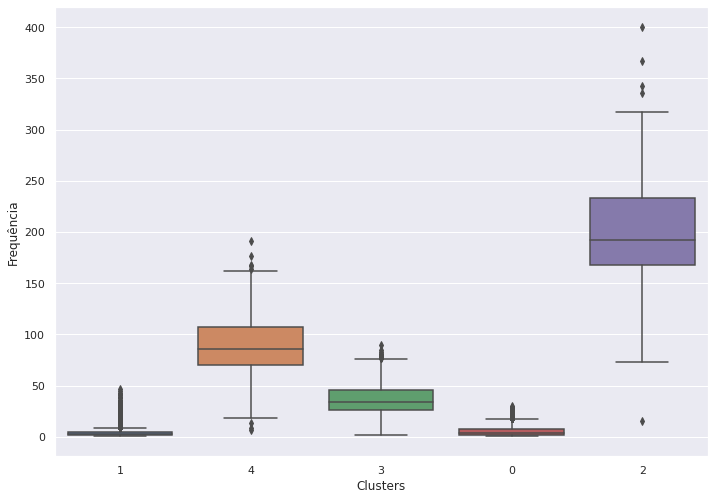

In [ ]:
sns.boxplot(x="Clusters", y="Frequência", data=df_kmeans5_tratado)

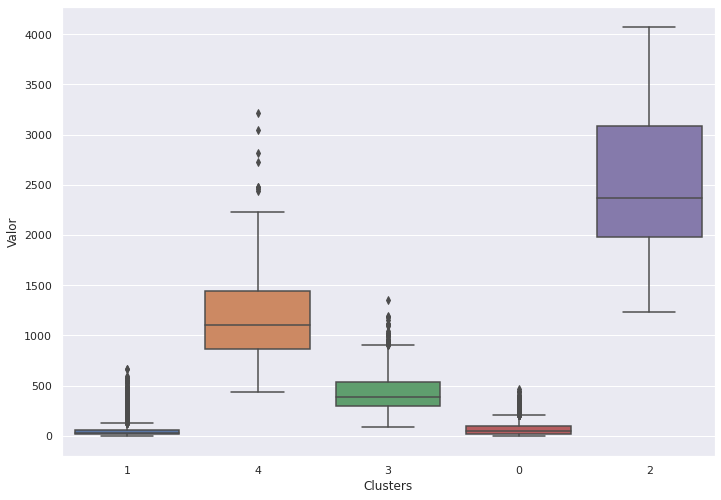

In [ ]:
sns.boxplot(x="Clusters", y="Valor", data=df_kmeans5_tratado)

### Conclusão:

Cluster 0 (8101 Clientes - 51,06%): Clientes que fizeram poucas compras, tendo gasto em média R$67,00 reais, porém muitos não vão mais a loja.

Cluster 1 (6056 Clientes 38,17%): Clientes que fizeram poucas compras, tendo gasto em média R$52,00 reais e não foram mais as lojas, tendo mais de 60 dias que não voltaram.

Cluster 2 (68 Clientes - 0,43%): Clientes que fizeram MUITAS compras, tendo gasto em média R$2565,00 reais, a grande maioria continua frequentando as lojas.

Cluster 3 (1345 Clientes - 08,48%): Clientes que fizeram algumas compras, tendo gasto em média R$434,00 reais, a maioria continua frequentando as lojas, porém alguns já não vão há mais de 30 dias.

Cluster 4 (295 Clientes - 1,86%): Clientes que fizeram muitas compras, tendo gasto em média R$1209,00 reais, a maioria continua frequentando as lojas, porém 11,94% já não vão a mais de 30 dias.

In [ ]:
cluster5_tratado = df_kmeans5_tratado.groupby(['Clusters'])['Valor'].sum().reset_index()

In [ ]:
cluster5_tratado

,Clusters,Valor
0,0,543325.28
1,1,316310.71
2,2,174432.62
3,3,583862.61
4,4,356753.03


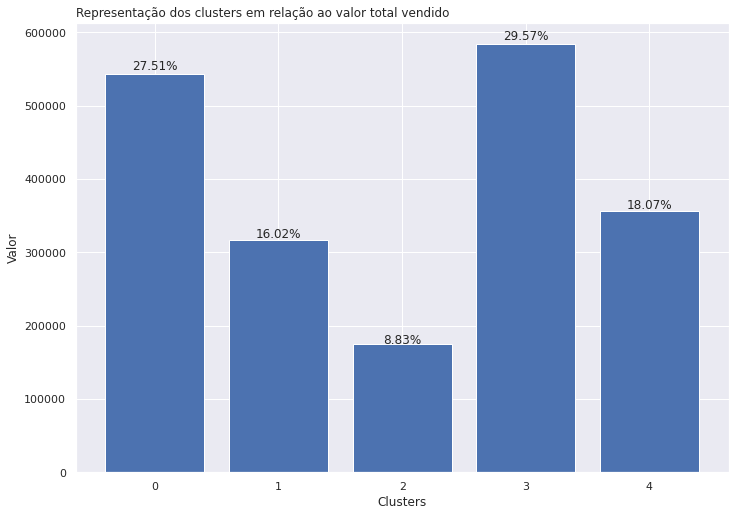

In [ ]:
graph_cluster5_tratado = plt.bar(cluster5_tratado['Clusters'], cluster5_tratado['Valor'])
plt.title('Representação dos clusters em relação ao valor total vendido', loc='left')
plt.ylabel('Valor')
plt.xlabel('Clusters')

i = 0
for p in graph_cluster5_tratado:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2, y+height*1.01, str(round((((cluster5_tratado['Valor']-1974684.25)/1974684.25)+1)*100,2)[i])+'%', ha='center')
    i+=1

plt.show()

In [ ]:
df_kmeans5_tratado['Clusters'].value_counts()

0    8101
1    6056
3    1345
4     295
2      68
Name: Clusters, dtype: int64

## Gaussian Mixture com 5 Clusters com tratamento de outliers

In [ ]:
scaler = StandardScaler()
df_norm_gm5_tratado = scaler.fit_transform(df_gm5_tratado)

In [ ]:
gm_model5_out = GaussianMixture(n_components=5, random_state=42)
gm_labels5_out = gm_model5_out.fit_predict(df_gm5_tratado)

In [ ]:
df_gm5_tratado['Clusters']= gm_labels5_out # aqui vamos atribuir pra cada cliente o seu devido cluster
df_gm5_tratado['Clusters']= df_gm5_tratado['Clusters'].astype(str)

In [ ]:
df_gm5_tratado['Clusters'].value_counts()

0    7053
4    5279
3    2086
1     893
2     554
Name: Clusters, dtype: int64

In [ ]:
gm_medidas5_out = ['count', 'min', 'mean', 'median', 'max']
gm_colunas5_out = ['Recência', 'Frequência', 'Valor']

gm_agrup5_out = df_gm5_tratado.groupby(['Clusters'])

resumo_gm5_out = gm_agrup5_out[gm_colunas5_out].agg(gm_medidas5_out)
resumo_gm5_out

Recência                            Frequência                        \
            count min       mean median  max      count min       mean median   
Clusters                                                                        
0            7053   1  73.887991   70.0  181       7053   1   2.471714    2.0   
1             893  13  76.228443   69.0  181        893   1  29.109742   23.0   
2             554   1   5.305054    4.0   35        554   2  85.480144   71.0   
3            2086   1  14.145254   13.0   47       2086   1  19.277565   18.0   
4            5279   1  69.456147   62.0  181       5279   1   6.499526    6.0   

              Valor                                         
          max count     min         mean   median      max  
Clusters                                                    
0           5  7053    1.00    19.885544   19.600    48.14  
1         216   893   57.87   454.615476  317.460  3934.24  
2         400   554  101.51  1049.522960  788.435  4068.50  
3          58  2086   40.58   219.960144  191.645   571.10  
4          19  5279    6.52    73.534251   64.810   194.70

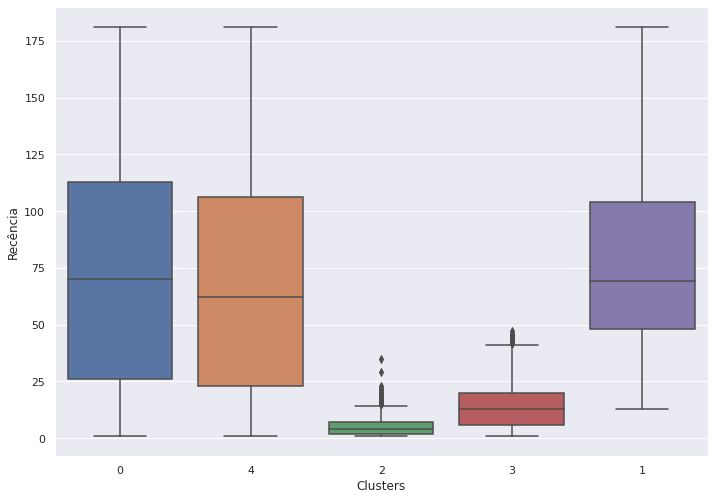

In [ ]:
sns.boxplot(x="Clusters", y="Recência", data=df_gm5_tratado)

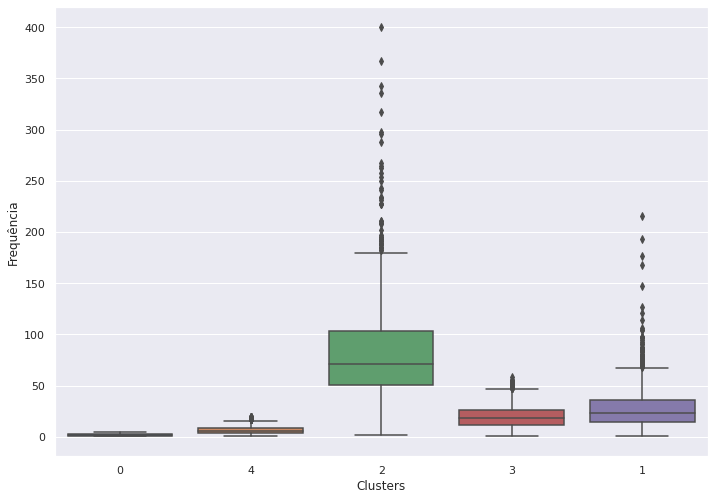

In [ ]:
sns.boxplot(x="Clusters", y="Frequência", data=df_gm5_tratado)

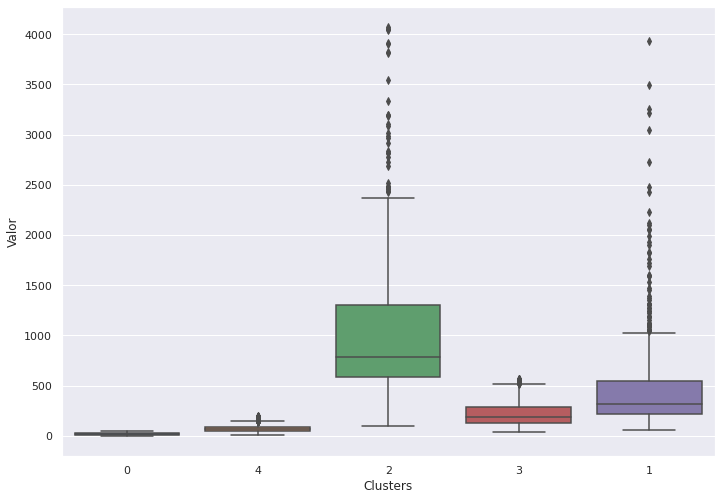

In [ ]:
sns.boxplot(x="Clusters", y="Valor", data=df_gm5_tratado)

### Conclusão:

Cluster 0 (7053 Clientes - 44,46%): Clientes que fizeram poucas compras, tendo gasto em média R$20,00 reais, porém mais de 70% não vão mais a loja.

Cluster 1 (893 Clientes 05,63%): Clientes que fizeram algumas compras, tendo gasto em média R$455,00 reais, porém mais de 85% não vão mais a loja.

Cluster 2 (554 Clientes - 03,49%): Clientes que fizeram MUITAS compras, tendo gasto em média R$1050,00 reais, a grande maioria continua frequentando as lojas.

Cluster 3 (2086 Clientes - 13,15%): Clientes que fizeram algumas compras, tendo gasto em média R$220,00 reais, a maioria continua frequentando as lojas, menos de 10% não vão a loja há mais de 30 dias.

Cluster 4 (5279 Clientes - 33,27%): Clientes que fizeram poucas compras, tendo gasto em média R$74,00 reais, mais de 70% dos clientes não vão a loja há mais de 30 dias.

In [ ]:
gm_cluster5_tratado = df_gm5_tratado.groupby(['Clusters'])['Valor'].sum().reset_index()

In [ ]:
gm_cluster5_tratado

,Clusters,Valor
0,0,140252.74
1,1,405971.62
2,2,581435.72
3,3,458836.86
4,4,388187.31


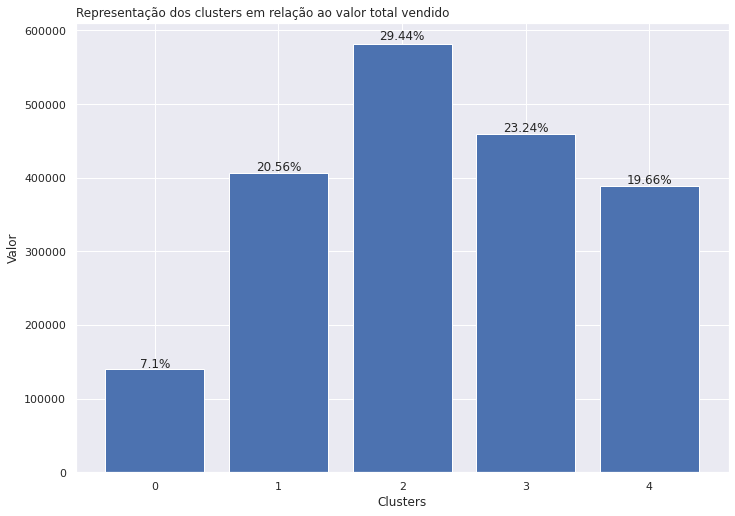

In [ ]:
graph_gm_cluster5_tratado = plt.bar(gm_cluster5_tratado['Clusters'], gm_cluster5_tratado['Valor'])
plt.title('Representação dos clusters em relação ao valor total vendido', loc='left')
plt.ylabel('Valor')
plt.xlabel('Clusters')

i = 0
for p in graph_gm_cluster5_tratado:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2, y+height*1.01, str(round((((gm_cluster5_tratado['Valor']-1974684.25)/1974684.25)+1)*100,2)[i])+'%', ha='center')
    i+=1

plt.show()

# Aplicando Decision Tree no modelo escolhido e no Gaussian Mixture para comparar a influência de cada variável em relação ao cluster

In [ ]:
# 2 modelos:
# df_gm5_tratado
# df_kmeans5_tratado

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## K-means 5:

In [ ]:
X = df_kmeans5_tratado.drop(columns='Clusters', axis=1)
y = df_kmeans5_tratado[['Clusters']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")

Acccuracy: 99.08603844941696%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1630
           1       0.99      1.00      1.00      1206
           2       0.82      1.00      0.90         9
           3       0.95      0.95      0.95       252
           4       0.97      0.91      0.94        76

    accuracy                           0.99      3173
   macro avg       0.95      0.97      0.96      3173
weighted avg       0.99      0.99      0.99      3173



In [ ]:
#!pip install explainerdashboard

In [ ]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
explainer1 = ClassifierExplainer(clf, X_test, y_test)

Note: model_output=='probability', so assuming that raw shap output of DecisionTreeClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)


In [ ]:
ExplainerDashboard(explainer1).run()

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating predictions...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.j

<IPython.core.display.Javascript object>

## Gaussian Mixture 5:

In [ ]:
X = df_gm5_tratado.drop(columns='Clusters', axis=1)
y = df_gm5_tratado[['Clusters']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
gm_clf = DecisionTreeClassifier()
gm_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = gm_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")

Acccuracy: 98.86542704065553%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1411
           1       0.96      0.97      0.97       182
           2       0.96      0.91      0.94       115
           3       0.97      0.98      0.97       417
           4       0.99      0.99      0.99      1048

    accuracy                           0.99      3173
   macro avg       0.98      0.97      0.97      3173
weighted avg       0.99      0.99      0.99      3173



In [ ]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard, ExplainerHub
explainer2 = ClassifierExplainer(gm_clf, X_test, y_test)

Note: model_output=='probability', so assuming that raw shap output of DecisionTreeClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)


In [ ]:
ExplainerDashboard(explainer2).run()

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating predictions...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.j

<IPython.core.display.Javascript object>

# Conclusão do Projeto:

Dentre todos os modelos testados, o modelo Kmeans com 5 Clusters e com tratamento de outliers foi o modelo que fez mais sentido para o negócio. Desta forma, será o modelo utilizado pela empresa para melhor direcionamento do seu marketing, tendo em vista a diminuição de custos e maior assertividade no contato com o cliente e seu retorno às lojas.